In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt
import scipy.stats as st
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.cluster.hierarchy import fcluster
import seaborn as sns
from sklearn import decomposition, preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import Axes3D

import warnings
warnings.filterwarnings("ignore")


# Nettoyage des jeux de données

## Disponibilité

In [2]:
dispo = pd.read_csv('dispo.csv')


In [3]:
dispo.head()

,Domain Code,Domain,Area Code,Area,Element Code,Element,Item Code,Item,Year Code,Year,Unit,Value,Flag,Flag Description
0,FBS,Food Balances (2010-),2,Afghanistan,5142,Food,2734,Poultry Meat,2012,2012,1000 tonnes,62.0,Im,FAO data based on imputation methodology
1,FBS,Food Balances (2010-),2,Afghanistan,5142,Food,2734,Poultry Meat,2013,2013,1000 tonnes,67.0,Im,FAO data based on imputation methodology
2,FBS,Food Balances (2010-),2,Afghanistan,5142,Food,2734,Poultry Meat,2014,2014,1000 tonnes,69.0,Im,FAO data based on imputation methodology
3,FBS,Food Balances (2010-),2,Afghanistan,5142,Food,2734,Poultry Meat,2015,2015,1000 tonnes,66.0,Im,FAO data based on imputation methodology
4,FBS,Food Balances (2010-),2,Afghanistan,5142,Food,2734,Poultry Meat,2016,2016,1000 tonnes,69.0,Im,FAO data based on imputation methodology


In [4]:
dispo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4680 entries, 0 to 4679
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Domain Code       4680 non-null   object 
 1   Domain            4680 non-null   object 
 2   Area Code         4680 non-null   int64  
 3   Area              4680 non-null   object 
 4   Element Code      4680 non-null   int64  
 5   Element           4680 non-null   object 
 6   Item Code         4680 non-null   int64  
 7   Item              4680 non-null   object 
 8   Year Code         4680 non-null   int64  
 9   Year              4680 non-null   int64  
 10  Unit              4680 non-null   object 
 11  Value             4680 non-null   float64
 12  Flag              4680 non-null   object 
 13  Flag Description  4680 non-null   object 
dtypes: float64(1), int64(5), object(8)
memory usage: 512.0+ KB


In [5]:
dispo['Unit'].unique()

array(['1000 tonnes', 'kg', 'kcal/capita/day', 'g/capita/day'],
      dtype=object)

In [6]:
#Supression des colonnes inutiles
dispo= dispo.drop(columns=['Domain Code', 'Domain','Area Code','Element Code','Item Code','Item','Year Code','Flag','Flag Description', 'Unit'])

In [7]:
#On renomme les colonnes
dispo.columns = ["Pays","Element","Année","Valeur"]

In [8]:
dispo['Pays'].nunique()

156

In [9]:
dispo.head(45)

,Pays,Element,Année,Valeur
0,Afghanistan,Food,2012,62.00
1,Afghanistan,Food,2013,67.00
2,Afghanistan,Food,2014,69.00
3,Afghanistan,Food,2015,66.00
4,Afghanistan,Food,2016,69.00
5,Afghanistan,Food,2017,64.00
6,Afghanistan,Food supply quantity (kg/capita/yr),2012,2.00
7,Afghanistan,Food supply quantity (kg/capita/yr),2013,2.06
8,Afghanistan,Food supply quantity (kg/capita/yr),2014,2.07
9,Afghanistan,Food supply quantity (kg/capita/yr),2015,1.92


In [10]:
#Pivot de dispo pour la colonne "Element"
dispo= pd.pivot_table(dispo, index= ["Pays","Année"], columns= "Element", values= ["Valeur"])
dispo.reset_index( inplace=True)
#dispo.set_index('Pays', inplace = True)

In [11]:
dispo.head()

Pays Année                             Valeur        \
Element                    Fat supply quantity (g/capita/day)  Food   
0        Afghanistan  2012                               0.43  62.0   
1        Afghanistan  2013                               0.45  67.0   
2        Afghanistan  2014                               0.45  69.0   
3        Afghanistan  2015                               0.42  66.0   
4        Afghanistan  2016                               0.42  69.0   

                                                                           \
Element Food supply (kcal/capita/day) Food supply quantity (kg/capita/yr)   
0                                 7.0                                2.00   
1                                 7.0                                2.06   
2                                 7.0                                2.07   
3                                 7.0                                1.92   
4                                 7.0                                1.96   

                                                
Element Protein supply quantity (g/capita/day)  
0                                         0.71  
1                                         0.73  
2                                         0.74  
3                                         0.69  
4                                         0.70

In [12]:
dispo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 936 entries, 0 to 935
Data columns (total 7 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   (Pays, )                                          936 non-null    object 
 1   (Année, )                                         936 non-null    int64  
 2   (Valeur, Fat supply quantity (g/capita/day))      936 non-null    float64
 3   (Valeur, Food)                                    936 non-null    float64
 4   (Valeur, Food supply (kcal/capita/day))           936 non-null    float64
 5   (Valeur, Food supply quantity (kg/capita/yr))     936 non-null    float64
 6   (Valeur, Protein supply quantity (g/capita/day))  936 non-null    float64
dtypes: float64(5), int64(1), object(1)
memory usage: 51.3+ KB


In [13]:
#On renomme les colonnes
dispo.columns = ["Pays","Année","Quantité de matières grasses de poulet(g/personne/jour)","Nourriture","Quantité de nourriture de poulet (kcal/personne/jour)", "Quantité de nourriture de poulet (kg/personne/an)","Quantité de Proteine de poulet (g/personne/jour)"]

In [14]:
dispo.head()

,Pays,Année,Quantité de matières grasses de poulet(g/personne/jour),Nourriture,Quantité de nourriture de poulet (kcal/personne/jour),Quantité de nourriture de poulet (kg/personne/an),Quantité de Proteine de poulet (g/personne/jour)
0,Afghanistan,2012,0.43,62.0,7.0,2.00,0.71
1,Afghanistan,2013,0.45,67.0,7.0,2.06,0.73
2,Afghanistan,2014,0.45,69.0,7.0,2.07,0.74
3,Afghanistan,2015,0.42,66.0,7.0,1.92,0.69
4,Afghanistan,2016,0.42,69.0,7.0,1.96,0.70


In [15]:
#Supression des colonnes inutiles
dispo= dispo.drop(columns=['Nourriture'])

In [16]:
#On retire les pays qui ne sont pas dans les autres jeux de données
dispo.drop( dispo[ dispo['Pays'] == 'Central African Republic' ].index, inplace=True)
dispo.drop( dispo[ dispo['Pays'] == 'Guyana' ].index, inplace=True)

In [17]:
dispo.head()

,Pays,Année,Quantité de matières grasses de poulet(g/personne/jour),Quantité de nourriture de poulet (kcal/personne/jour),Quantité de nourriture de poulet (kg/personne/an),Quantité de Proteine de poulet (g/personne/jour)
0,Afghanistan,2012,0.43,7.0,2.00,0.71
1,Afghanistan,2013,0.45,7.0,2.06,0.73
2,Afghanistan,2014,0.45,7.0,2.07,0.74
3,Afghanistan,2015,0.42,7.0,1.92,0.69
4,Afghanistan,2016,0.42,7.0,1.96,0.70


## PIB

In [18]:
pib = pd.read_csv('pib.csv')

In [19]:
pib.head()

,Domain Code,Domain,Area Code (FAO),Area,Element Code,Element,Item Code,Item,Year Code,Year,Unit,Value,Flag,Flag Description,Note
0,MK,Macro Indicators,2,Afghanistan,6119,Value US$ per capita,22008,Gross Domestic Product,2012,2012,US$,614.109574,X,International reliable sources,NaN
1,MK,Macro Indicators,2,Afghanistan,61290,Annual growth US$ per capita,22008,Gross Domestic Product,2012,2012,%,6.597411,Fc,Calculated data,NaN
2,MK,Macro Indicators,2,Afghanistan,6119,Value US$ per capita,22008,Gross Domestic Product,2013,2013,US$,608.058642,X,International reliable sources,NaN
3,MK,Macro Indicators,2,Afghanistan,61290,Annual growth US$ per capita,22008,Gross Domestic Product,2013,2013,%,-0.985318,Fc,Calculated data,NaN
4,MK,Macro Indicators,2,Afghanistan,6119,Value US$ per capita,22008,Gross Domestic Product,2014,2014,US$,585.862673,X,International reliable sources,NaN


In [20]:
pib.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1872 entries, 0 to 1871
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Domain Code       1872 non-null   object 
 1   Domain            1872 non-null   object 
 2   Area Code (FAO)   1872 non-null   int64  
 3   Area              1872 non-null   object 
 4   Element Code      1872 non-null   int64  
 5   Element           1872 non-null   object 
 6   Item Code         1872 non-null   int64  
 7   Item              1872 non-null   object 
 8   Year Code         1872 non-null   int64  
 9   Year              1872 non-null   int64  
 10  Unit              1872 non-null   object 
 11  Value             1872 non-null   float64
 12  Flag              1872 non-null   object 
 13  Flag Description  1872 non-null   object 
 14  Note              0 non-null      float64
dtypes: float64(2), int64(5), object(8)
memory usage: 219.5+ KB


In [21]:
#Supression des colonnes inutiles
pib= pib.drop(columns=['Domain Code', 'Domain','Area Code (FAO)','Element Code','Item Code','Item','Year Code','Flag','Flag Description', 'Note', 'Unit'])

In [22]:
pib.head()

,Area,Element,Year,Value
0,Afghanistan,Value US$ per capita,2012,614.109574
1,Afghanistan,Annual growth US$ per capita,2012,6.597411
2,Afghanistan,Value US$ per capita,2013,608.058642
3,Afghanistan,Annual growth US$ per capita,2013,-0.985318
4,Afghanistan,Value US$ per capita,2014,585.862673


In [23]:
pib['Area'].nunique()

156

In [24]:
#On renomme les colonnes
pib.columns = ["Pays","Element","Année","Valeur"]

In [25]:
#Pivot de pib pour la colonne "Element"
pib= pd.pivot_table(pib, index= ["Pays","Année"], columns= "Element", values= ["Valeur"])
pib.reset_index( inplace=True)


In [26]:
#On renomme les colonnes
pib.columns = ["Pays", "Année","Taux de croissance du PIB par habitant (%)","PIB par habitant"]

In [27]:
#On arrondie à deux chiffres après la virgule
pib['Taux de croissance du PIB par habitant (%)']=np.round(pib['Taux de croissance du PIB par habitant (%)'], decimals = 2)
pib['PIB par habitant']=np.round(pib['PIB par habitant'], decimals = 2)

In [28]:
#On retire les pays qui ne sont pas dans les autres jeux de données
pib.drop( pib[ pib['Pays'] == 'Central African Republic' ].index, inplace=True)
pib.drop( pib[ pib['Pays'] == 'Guyana' ].index, inplace=True)

In [29]:
#On ré-organise les colonnes 
new_order = [0,1,3,2]
pib = pib[pib.columns[new_order]]

In [30]:
pib.head()

,Pays,Année,PIB par habitant,Taux de croissance du PIB par habitant (%)
0,Afghanistan,2012,614.11,6.60
1,Afghanistan,2013,608.06,-0.99
2,Afghanistan,2014,585.86,-3.65
3,Afghanistan,2015,543.77,-7.18
4,Afghanistan,2016,509.78,-6.25


## Population

In [31]:
population = pd.read_csv('population.csv')

In [32]:
population.head()

,Domain Code,Domain,Area Code (FAO),Area,Element Code,Element,Item Code,Item,Year Code,Year,Unit,Value,Flag,Flag Description,Note
0,OA,Annual population,2,Afghanistan,511,Total Population - Both sexes,3010,Population - Est. & Proj.,2012,2012,1000 persons,31161.376,X,International reliable sources,NaN
1,OA,Annual population,2,Afghanistan,551,Rural population,3010,Population - Est. & Proj.,2012,2012,1000 persons,23280.663,X,International reliable sources,NaN
2,OA,Annual population,2,Afghanistan,561,Urban population,3010,Population - Est. & Proj.,2012,2012,1000 persons,7416.295,X,International reliable sources,"UNDESA, Population Division ? World Urbanizati..."
3,OA,Annual population,2,Afghanistan,511,Total Population - Both sexes,3010,Population - Est. & Proj.,2013,2013,1000 persons,32269.589,X,International reliable sources,NaN
4,OA,Annual population,2,Afghanistan,551,Rural population,3010,Population - Est. & Proj.,2013,2013,1000 persons,23997.856,X,International reliable sources,NaN


In [33]:
population.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2844 entries, 0 to 2843
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Domain Code       2844 non-null   object 
 1   Domain            2844 non-null   object 
 2   Area Code (FAO)   2844 non-null   int64  
 3   Area              2844 non-null   object 
 4   Element Code      2844 non-null   int64  
 5   Element           2844 non-null   object 
 6   Item Code         2844 non-null   int64  
 7   Item              2844 non-null   object 
 8   Year Code         2844 non-null   int64  
 9   Year              2844 non-null   int64  
 10  Unit              2844 non-null   object 
 11  Value             2844 non-null   float64
 12  Flag              2844 non-null   object 
 13  Flag Description  2844 non-null   object 
 14  Note              977 non-null    object 
dtypes: float64(1), int64(5), object(9)
memory usage: 333.4+ KB


In [34]:
population['Area'].nunique()

158

In [35]:
#Supression des colonnes inutiles
population= population.drop(columns=['Domain Code', 'Domain','Area Code (FAO)','Element Code','Item Code','Item','Year Code','Flag','Flag Description', 'Note', 'Unit'])

In [36]:
population.head()

,Area,Element,Year,Value
0,Afghanistan,Total Population - Both sexes,2012,31161.376
1,Afghanistan,Rural population,2012,23280.663
2,Afghanistan,Urban population,2012,7416.295
3,Afghanistan,Total Population - Both sexes,2013,32269.589
4,Afghanistan,Rural population,2013,23997.856


In [37]:
#On renomme les colonnes
population.columns = ["Pays","Element","Année","Valeur"]

In [38]:
#Pivot de population pour la colonne "Element"
population= pd.pivot_table(population, index= ["Pays","Année"], columns= "Element", values= ["Valeur"])
population.reset_index( inplace=True)


In [39]:
#On renomme les colonnes
population.columns = ["Pays", "Année","Population rural","Population total", "Population urbaine"]

In [40]:
#On ré-organise les colonnes 
new_order = [0,1,2,4,3]
population = population[population.columns[new_order]]

In [41]:
#On passe les valeur de la population à l'unité plutot qu'en millier
population['Population rural']=population['Population rural']*1000
population['Population urbaine']=population['Population urbaine']*1000
population['Population total']=population['Population total']*1000

In [42]:
#On passe la colonne valeur en int pour eviter l'affichage (.0)
population['Population rural']=population['Population rural'].astype('int')
population['Population urbaine']=population['Population urbaine'].astype('int')
population['Population total']=population['Population total'].astype('int')

In [43]:
#On retire les pays qui ne sont pas dans les autres jeux de données
population.drop( population[ population['Pays'] == 'Central African Republic' ].index, inplace=True)
population.drop( population[ population['Pays'] == 'Guyana' ].index, inplace=True)
population.drop( population[ population['Pays'] == 'China, mainland' ].index, inplace=True)
population.drop( population[ population['Pays'] == 'French Polynesia' ].index, inplace=True)

In [44]:
population.head()

,Pays,Année,Population rural,Population urbaine,Population total
0,Afghanistan,2012,23280662,7416295,31161376
1,Afghanistan,2013,23997856,7733831,32269589
2,Afghanistan,2014,24703798,8054222,33370794
3,Afghanistan,2015,25368923,8367571,34413602
4,Afghanistan,2016,25985092,8670939,35383032


## Chicken

In [45]:
chicken = pd.read_csv('chicken.csv')

In [46]:
chicken.head()

,Domain Code,Domain,Area Code (FAO),Area,Element Code,Element,Item Code (CPC),Item,Year Code,Year,Unit,Value,Flag,Flag Description
0,SCL,Supply Utilization Accounts,2,Afghanistan,5610,Import Quantity,2151,Chickens,2012,2012,tonnes,1094,NaN,Official data
1,SCL,Supply Utilization Accounts,2,Afghanistan,5610,Import Quantity,2151,Chickens,2013,2013,tonnes,3352,*,Unofficial figure
2,SCL,Supply Utilization Accounts,2,Afghanistan,5610,Import Quantity,2151,Chickens,2014,2014,tonnes,496,NaN,Official data
3,SCL,Supply Utilization Accounts,2,Afghanistan,5610,Import Quantity,2151,Chickens,2015,2015,tonnes,0,NaN,Official data
4,SCL,Supply Utilization Accounts,2,Afghanistan,5610,Import Quantity,2151,Chickens,2016,2016,tonnes,618,NaN,Official data


In [47]:
chicken.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 936 entries, 0 to 935
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Domain Code       936 non-null    object
 1   Domain            936 non-null    object
 2   Area Code (FAO)   936 non-null    int64 
 3   Area              936 non-null    object
 4   Element Code      936 non-null    int64 
 5   Element           936 non-null    object
 6   Item Code (CPC)   936 non-null    int64 
 7   Item              936 non-null    object
 8   Year Code         936 non-null    int64 
 9   Year              936 non-null    int64 
 10  Unit              936 non-null    object
 11  Value             936 non-null    int64 
 12  Flag              130 non-null    object
 13  Flag Description  936 non-null    object
dtypes: int64(6), object(8)
memory usage: 102.5+ KB


In [48]:
chicken['Area'].nunique()

156

In [49]:
chicken['Unit'].unique()

array(['tonnes'], dtype=object)

In [50]:
#Supression des colonnes inutiles
chicken= chicken.drop(columns=['Domain Code', 'Domain','Area Code (FAO)','Element Code','Item Code (CPC)','Item','Year Code','Flag','Flag Description', 'Unit'])

In [51]:
#On renomme les colonnes
chicken.columns = ["Pays","Element","Année","Valeur"]

In [52]:
#Pivot de chicken pour la colonne "Element"
chicken= pd.pivot_table(chicken, index= ["Pays","Année"], columns= "Element", values= ["Valeur"])
chicken.reset_index( inplace=True)


In [53]:
#On renomme les colonnes
chicken.columns = ["Pays", "Année", "Poulet importé (Tonnes)"]

In [54]:
#On retire les pays qui ne sont pas dans les autres jeux de données
chicken.drop( chicken[ chicken['Pays'] == 'Central African Republic' ].index, inplace=True)
chicken.drop( chicken[ chicken['Pays'] == 'Guyana' ].index, inplace=True)

In [55]:
chicken.head()

,Pays,Année,Poulet importé (Tonnes)
0,Afghanistan,2012,1094
1,Afghanistan,2013,3352
2,Afghanistan,2014,496
3,Afghanistan,2015,0
4,Afghanistan,2016,618


## Stability

In [56]:
stability = pd.read_csv('stability.csv')

In [57]:
stability.head()

,Domain Code,Domain,Area Code (FAO),Area,Element Code,Element,Item Code,Item,Year Code,Year,Unit,Value,Flag,Flag Description,Note
0,FS,Suite of Food Security Indicators,2,Afghanistan,6125,Value,21032,Political stability and absence of violence/te...,2012,2012,index,-2.42,X,International reliable sources,NaN
1,FS,Suite of Food Security Indicators,2,Afghanistan,6125,Value,21032,Political stability and absence of violence/te...,2013,2013,index,-2.52,X,International reliable sources,NaN
2,FS,Suite of Food Security Indicators,2,Afghanistan,6125,Value,21032,Political stability and absence of violence/te...,2014,2014,index,-2.41,X,International reliable sources,NaN
3,FS,Suite of Food Security Indicators,2,Afghanistan,6125,Value,21032,Political stability and absence of violence/te...,2015,2015,index,-2.57,X,International reliable sources,NaN
4,FS,Suite of Food Security Indicators,2,Afghanistan,6125,Value,21032,Political stability and absence of violence/te...,2016,2016,index,-2.67,X,International reliable sources,NaN


In [58]:
stability.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 936 entries, 0 to 935
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Domain Code       936 non-null    object 
 1   Domain            936 non-null    object 
 2   Area Code (FAO)   936 non-null    int64  
 3   Area              936 non-null    object 
 4   Element Code      936 non-null    int64  
 5   Element           936 non-null    object 
 6   Item Code         936 non-null    int64  
 7   Item              936 non-null    object 
 8   Year Code         936 non-null    int64  
 9   Year              936 non-null    int64  
 10  Unit              936 non-null    object 
 11  Value             936 non-null    float64
 12  Flag              936 non-null    object 
 13  Flag Description  936 non-null    object 
 14  Note              0 non-null      float64
dtypes: float64(2), int64(5), object(8)
memory usage: 109.8+ KB


In [59]:
#Supression des colonnes inutiles
stability= stability.drop(columns=['Domain Code', 'Domain','Area Code (FAO)','Element Code','Item Code','Item','Year Code','Flag','Flag Description', 'Note', 'Unit'])

In [60]:
stability['Area'].nunique()

156

In [61]:
#On renomme les colonnes
stability.columns = ["Pays","Element","Année","Valeur"]

In [62]:
#Pivot de stability pour la colonne "Element"
stability= pd.pivot_table(stability, index= ["Pays","Année"], columns= "Element", values= ["Valeur"])
stability.reset_index( inplace=True)


In [63]:
#On renomme les colonnes
stability.columns = ["Pays", "Année", "Stabilité politique"]

In [64]:
#On retire les pays qui ne sont pas dans les autres jeux de données
stability.drop( stability[ stability['Pays'] == 'Central African Republic' ].index, inplace=True)
stability.drop( stability[ stability['Pays'] == 'Guyana' ].index, inplace=True)

In [65]:
stability.head()

,Pays,Année,Stabilité politique
0,Afghanistan,2012,-2.42
1,Afghanistan,2013,-2.52
2,Afghanistan,2014,-2.41
3,Afghanistan,2015,-2.57
4,Afghanistan,2016,-2.67


# Inflation

In [66]:
inflation = pd.read_csv('inflation.csv')

In [67]:
inflation.head()

,Domain Code,Domain,Area Code (M49),Area,Year Code,Year,Item Code,Item,Months Code,Months,Unit,Value,Flag,Flag Description,Note
0,CP,Consumer Price Indices,4,Afghanistan,2012,2012,23014,Food price inflation,7001,January,%,5.193009,Fc,Calculated data,NaN
1,CP,Consumer Price Indices,4,Afghanistan,2013,2013,23014,Food price inflation,7001,January,%,5.066044,Fc,Calculated data,NaN
2,CP,Consumer Price Indices,4,Afghanistan,2014,2014,23014,Food price inflation,7001,January,%,9.092442,Fc,Calculated data,NaN
3,CP,Consumer Price Indices,4,Afghanistan,2015,2015,23014,Food price inflation,7001,January,%,2.957042,Fc,Calculated data,NaN
4,CP,Consumer Price Indices,4,Afghanistan,2016,2016,23014,Food price inflation,7001,January,%,1.117175,Fc,Calculated data,NaN


In [68]:
inflation.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11088 entries, 0 to 11087
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Domain Code       11088 non-null  object 
 1   Domain            11088 non-null  object 
 2   Area Code (M49)   11088 non-null  int64  
 3   Area              11088 non-null  object 
 4   Year Code         11088 non-null  int64  
 5   Year              11088 non-null  int64  
 6   Item Code         11088 non-null  int64  
 7   Item              11088 non-null  object 
 8   Months Code       11088 non-null  int64  
 9   Months            11088 non-null  object 
 10  Unit              11088 non-null  object 
 11  Value             11088 non-null  float64
 12  Flag              11088 non-null  object 
 13  Flag Description  11088 non-null  object 
 14  Note              0 non-null      float64
dtypes: float64(2), int64(5), object(8)
memory usage: 1.3+ MB


In [69]:
inflation['Area'].nunique()

154

In [70]:
#Supression des colonnes inutiles
inflation= inflation.drop(columns=['Domain Code', 'Domain','Area Code (M49)','Item Code','Item','Year Code','Months Code','Flag','Flag Description', 'Note', 'Unit'])

In [71]:
#On renomme les colonnes
inflation.columns = ["Pays","Année","Mois","Valeur"]

In [72]:
#Pivot de inflation pour la colonne "Mois"
inflation= pd.pivot_table(inflation, index= ["Pays","Année"], columns= "Mois", values= ["Valeur"])
inflation.reset_index( inplace=True)


In [73]:
#On renomme les colonnes
inflation.columns = ["Pays", "Année", "Mois1", "Mois2", "Mois3", "Mois4", "Mois5", "Mois6", "Mois7", "Mois8", "Mois9", "Mois10", "Mois11", "Mois12"]

In [74]:
inflation.head()

,Pays,Année,Mois1,Mois2,Mois3,Mois4,Mois5,Mois6,Mois7,Mois8,Mois9,Mois10,Mois11,Mois12
0,Afghanistan,2012,7.420967,2.391246,4.539537,5.101171,5.193009,2.620311,5.443715,6.997124,7.225344,4.516943,2.141406,3.486407
1,Afghanistan,2013,6.503630,9.988970,9.622056,6.339626,5.066044,9.705699,6.931698,5.180924,5.225325,8.365253,8.809451,9.096802
2,Afghanistan,2014,9.548807,7.109336,2.947278,8.522722,9.092442,10.050818,9.698489,10.044094,10.658337,3.124351,5.936759,6.818086
3,Afghanistan,2015,-2.580623,-2.769992,0.780271,1.380448,2.957042,-4.487919,-2.194086,-0.584370,-2.955767,1.070726,-0.110944,-0.426525
4,Afghanistan,2016,5.629523,7.896962,5.849971,3.347968,1.117175,7.975064,6.115633,4.877748,5.242233,6.558280,6.557299,7.011259


In [75]:
columns_inflation = ["Mois1", "Mois2", "Mois3", "Mois4", "Mois5", "Mois6", "Mois7", "Mois8", "Mois9", "Mois10", "Mois11", "Mois12"]
inflation['Taux_inflation_alimentaire_année'] = inflation[columns_inflation].mean(axis=1)

In [76]:

#On suprimme les colonnes
inflation =inflation.drop(["Mois1", "Mois2", "Mois3", "Mois4", "Mois5", "Mois6", "Mois7", "Mois8", "Mois9", "Mois10", "Mois11", "Mois12"], axis=1)

In [77]:
inflation.head()

,Pays,Année,Taux_inflation_alimentaire_année
0,Afghanistan,2012,4.756432
1,Afghanistan,2013,7.569623
2,Afghanistan,2014,7.795960
3,Afghanistan,2015,-0.826812
4,Afghanistan,2016,5.681593


# Prix conso

In [78]:
conso = pd.read_csv('prixconso.csv')

In [79]:
conso.head()

,Domain Code,Domain,Area Code (M49),Area,Year Code,Year,Item Code,Item,Months Code,Months,Unit,Value,Flag,Flag Description,Note
0,CP,Consumer Price Indices,4,Afghanistan,2012,2012,23013,"Consumer Prices, Food Indices (2015 = 100)",7001,January,NaN,86.835669,X,International reliable sources,base year is 2015
1,CP,Consumer Price Indices,4,Afghanistan,2013,2013,23013,"Consumer Prices, Food Indices (2015 = 100)",7001,January,NaN,91.234802,X,International reliable sources,base year is 2015
2,CP,Consumer Price Indices,4,Afghanistan,2014,2014,23013,"Consumer Prices, Food Indices (2015 = 100)",7001,January,NaN,99.530273,X,International reliable sources,base year is 2015
3,CP,Consumer Price Indices,4,Afghanistan,2015,2015,23013,"Consumer Prices, Food Indices (2015 = 100)",7001,January,NaN,102.473425,X,International reliable sources,base year is 2015
4,CP,Consumer Price Indices,4,Afghanistan,2016,2016,23013,"Consumer Prices, Food Indices (2015 = 100)",7001,January,NaN,103.618233,X,International reliable sources,base year is 2015


In [80]:
conso.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11088 entries, 0 to 11087
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Domain Code       11088 non-null  object 
 1   Domain            11088 non-null  object 
 2   Area Code (M49)   11088 non-null  int64  
 3   Area              11088 non-null  object 
 4   Year Code         11088 non-null  int64  
 5   Year              11088 non-null  int64  
 6   Item Code         11088 non-null  int64  
 7   Item              11088 non-null  object 
 8   Months Code       11088 non-null  int64  
 9   Months            11088 non-null  object 
 10  Unit              0 non-null      float64
 11  Value             11088 non-null  float64
 12  Flag              10007 non-null  object 
 13  Flag Description  11088 non-null  object 
 14  Note              11088 non-null  object 
dtypes: float64(2), int64(5), object(8)
memory usage: 1.3+ MB


In [81]:
#Supression des colonnes inutiles
conso= conso.drop(columns=['Domain Code', 'Domain','Area Code (M49)','Item Code','Item','Year Code','Months Code','Flag','Flag Description', 'Note', 'Unit'])

In [82]:
conso['Area'].nunique()

154

In [83]:
#On renomme les colonnes
conso.columns = ["Pays","Année","Mois","Valeur"]

In [84]:
#Pivot de conso pour la colonne "Mois"
conso= pd.pivot_table(conso, index= ["Pays","Année"], columns= "Mois", values= ["Valeur"])
conso.reset_index( inplace=True)


In [85]:
#On renomme les colonnes
conso.columns = ["Pays", "Année", "Mois1", "Mois2", "Mois3", "Mois4", "Mois5", "Mois6", "Mois7", "Mois8", "Mois9", "Mois10", "Mois11", "Mois12"]

In [86]:
columns_conso = ["Mois1", "Mois2", "Mois3", "Mois4", "Mois5", "Mois6", "Mois7", "Mois8", "Mois9", "Mois10", "Mois11", "Mois12"]
conso['Indice_prix_conso_alimentaire_année'] = conso[columns_conso].mean(axis=1)

In [87]:
#On suprimme les colonnes
conso =conso.drop(["Mois1", "Mois2", "Mois3", "Mois4", "Mois5", "Mois6", "Mois7", "Mois8", "Mois9", "Mois10", "Mois11", "Mois12"], axis=1)

In [88]:
conso.head()

,Pays,Année,Indice_prix_conso_alimentaire_année
0,Afghanistan,2012,87.028704
1,Afghanistan,2013,93.618813
2,Afghanistan,2014,100.861938
3,Afghanistan,2015,100.010941
4,Afghanistan,2016,105.677588


## DF
Quelques ajustements sur les données avant la fusion pour garder seulement une lignes par pays.
Nous allons donc faire des moyennes sur les 6 années que l'on a pour la plupart des colonnes et nous allons calculer le taux d'accroissement de la population pour la colonne Population total

### Chicken

In [89]:
#On renomme les colonnes pour que ce soit plus simple a manipuler
chicken.columns = ["Pays","Année","Poulet"]

In [90]:
#On stock les valeurs des poulet importé pour chaque pays des années 2012 et 2017
chicken2017=chicken.groupby(by="Année").get_group(2017).Poulet.values
chicken2016=chicken.groupby(by="Année").get_group(2016).Poulet.values
chicken2015=chicken.groupby(by="Année").get_group(2015).Poulet.values
chicken2014=chicken.groupby(by="Année").get_group(2014).Poulet.values
chicken2013=chicken.groupby(by="Année").get_group(2013).Poulet.values
chicken2012=chicken.groupby(by="Année").get_group(2012).Poulet.values

In [91]:
chicken=chicken.groupby(by="Année").get_group(2017)

In [92]:
#On crée une nouvelle colonne qui calcul la moyenne d'importation de poulet entre 2012 et 2017
chicken["Quantité moyenne d'importation de poulet (Tonnes)"]=((chicken2017+chicken2016+chicken2015+chicken2014+chicken2013+chicken2012)/6)

#On passe la colonne value en int pour avoir un chiffre entier
chicken["Quantité moyenne d'importation de poulet (Tonnes)"]=chicken["Quantité moyenne d'importation de poulet (Tonnes)"].astype('int')

#On suprimme la colonne poulet
chicken = chicken.drop(["Année", "Poulet"], 1)

In [93]:
chicken.head()

,Pays,Quantité moyenne d'importation de poulet (Tonnes)
5,Afghanistan,1058
11,Albania,3653
17,Algeria,2109
23,Angola,112
29,Antigua and Barbuda,16


### Dispo

In [94]:
dispo.head()

,Pays,Année,Quantité de matières grasses de poulet(g/personne/jour),Quantité de nourriture de poulet (kcal/personne/jour),Quantité de nourriture de poulet (kg/personne/an),Quantité de Proteine de poulet (g/personne/jour)
0,Afghanistan,2012,0.43,7.0,2.00,0.71
1,Afghanistan,2013,0.45,7.0,2.06,0.73
2,Afghanistan,2014,0.45,7.0,2.07,0.74
3,Afghanistan,2015,0.42,7.0,1.92,0.69
4,Afghanistan,2016,0.42,7.0,1.96,0.70


In [95]:
#On renomme les colonnes pour que ce soit plus simple a manipuler
dispo.columns = ["Pays","Année","mg","kcal","kg","g"]

In [96]:
#On stock les valeurs des colonnes pour chaque pays des années 2012 et 2017
#mg
dispomg2017=dispo.groupby(by="Année").get_group(2017).mg.values
dispomg2016=dispo.groupby(by="Année").get_group(2016).mg.values
dispomg2015=dispo.groupby(by="Année").get_group(2015).mg.values
dispomg2014=dispo.groupby(by="Année").get_group(2014).mg.values
dispomg2013=dispo.groupby(by="Année").get_group(2013).mg.values
dispomg2012=dispo.groupby(by="Année").get_group(2012).mg.values

#kcal
dispokcal2017=dispo.groupby(by="Année").get_group(2017).kcal.values
dispokcal2016=dispo.groupby(by="Année").get_group(2016).kcal.values
dispokcal2015=dispo.groupby(by="Année").get_group(2015).kcal.values
dispokcal2014=dispo.groupby(by="Année").get_group(2014).kcal.values
dispokcal2013=dispo.groupby(by="Année").get_group(2013).kcal.values
dispokcal2012=dispo.groupby(by="Année").get_group(2012).kcal.values

#kg
dispokg2017=dispo.groupby(by="Année").get_group(2017).kg.values
dispokg2016=dispo.groupby(by="Année").get_group(2016).kg.values
dispokg2015=dispo.groupby(by="Année").get_group(2015).kg.values
dispokg2014=dispo.groupby(by="Année").get_group(2014).kg.values
dispokg2013=dispo.groupby(by="Année").get_group(2013).kg.values
dispokg2012=dispo.groupby(by="Année").get_group(2012).kg.values

#g
dispog2017=dispo.groupby(by="Année").get_group(2017).g.values
dispog2016=dispo.groupby(by="Année").get_group(2016).g.values
dispog2015=dispo.groupby(by="Année").get_group(2015).g.values
dispog2014=dispo.groupby(by="Année").get_group(2014).g.values
dispog2013=dispo.groupby(by="Année").get_group(2013).g.values
dispog2012=dispo.groupby(by="Année").get_group(2012).g.values

In [97]:
dispo=dispo.groupby(by="Année").get_group(2017)

In [98]:
#On crée ude nouvelle colonne qui calcul la moyenne de chaque colonne entre 2012 et 2017
dispo["Quantité moyenne de matières grasses de poulet(g/personne/jour)"]=((dispomg2017+dispomg2016+dispomg2015+dispomg2014+dispomg2013+dispomg2012)/6)
dispo["Quantité moyenne de nourriture de poulet (kcal/personne/jour)"]=((dispokcal2017+dispokcal2016+dispokcal2015+dispokcal2014+dispokcal2013+dispokcal2012)/6)
dispo["Quantité moyenne de nourriture de poulet (kg/personne/an)"]=((dispokg2017+dispokg2016+dispokg2015+dispokg2014+dispokg2013+dispokg2012)/6)
dispo["Quantité moyenne en Proteine de poulet (g/personne/jour)"]=((dispog2017+dispog2016+dispog2015+dispog2014+dispog2013+dispog2012)/6)

#On suprimme la colonne inutiles
dispo = dispo.drop(["Année", "mg", "kcal", "kg", "g"], 1)

In [99]:
#On arrondie à deux chiffres après la virgule
dispo["Quantité moyenne de matières grasses de poulet(g/personne/jour)"]=np.round(dispo["Quantité moyenne de matières grasses de poulet(g/personne/jour)"], decimals = 2)
dispo["Quantité moyenne de nourriture de poulet (kcal/personne/jour)"]=np.round(dispo["Quantité moyenne de nourriture de poulet (kcal/personne/jour)"], decimals = 2)
dispo["Quantité moyenne de nourriture de poulet (kg/personne/an)"]=np.round(dispo["Quantité moyenne de nourriture de poulet (kg/personne/an)"], decimals = 2)
dispo["Quantité moyenne en Proteine de poulet (g/personne/jour)"]=np.round(dispo["Quantité moyenne en Proteine de poulet (g/personne/jour)"], decimals = 2)

In [100]:
dispo.head()

,Pays,Quantité moyenne de matières grasses de poulet(g/personne/jour),Quantité moyenne de nourriture de poulet (kcal/personne/jour),Quantité moyenne de nourriture de poulet (kg/personne/an),Quantité moyenne en Proteine de poulet (g/personne/jour)
5,Afghanistan,0.43,6.83,1.96,0.70
11,Albania,5.05,66.00,12.72,4.82
17,Algeria,1.75,25.83,7.44,2.30
23,Angola,2.57,41.00,12.19,4.14
29,Antigua and Barbuda,19.35,256.17,59.51,19.40


### Population

In [101]:
population.head()

,Pays,Année,Population rural,Population urbaine,Population total
0,Afghanistan,2012,23280662,7416295,31161376
1,Afghanistan,2013,23997856,7733831,32269589
2,Afghanistan,2014,24703798,8054222,33370794
3,Afghanistan,2015,25368923,8367571,34413602
4,Afghanistan,2016,25985092,8670939,35383032


In [102]:
#On renomme les colonnes pour que ce soit plus simple a manipuler
population.columns = ["Pays","Année","rural","urbaine","population"]

In [103]:
#On stock les valeurs des colonnes pour chaque pays des années 2012 et 2017
#rural
rural2017=population.groupby(by="Année").get_group(2017).rural.values
rural2016=population.groupby(by="Année").get_group(2016).rural.values
rural2015=population.groupby(by="Année").get_group(2015).rural.values
rural2014=population.groupby(by="Année").get_group(2014).rural.values
rural2013=population.groupby(by="Année").get_group(2013).rural.values
rural2012=population.groupby(by="Année").get_group(2012).rural.values

#urbaine
urbaine2017=population.groupby(by="Année").get_group(2017).urbaine.values
urbaine2016=population.groupby(by="Année").get_group(2016).urbaine.values
urbaine2015=population.groupby(by="Année").get_group(2015).urbaine.values
urbaine2014=population.groupby(by="Année").get_group(2014).urbaine.values
urbaine2013=population.groupby(by="Année").get_group(2013).urbaine.values
urbaine2012=population.groupby(by="Année").get_group(2012).urbaine.values

#population total
population2017=population.groupby(by="Année").get_group(2017).population.values
population2016=population.groupby(by="Année").get_group(2016).population.values
population2015=population.groupby(by="Année").get_group(2015).population.values
population2014=population.groupby(by="Année").get_group(2014).population.values
population2013=population.groupby(by="Année").get_group(2013).population.values
population2012=population.groupby(by="Année").get_group(2012).population.values

In [104]:
#On garde les données de l'année 2012 et 2017 pour voir l'evolution de la population
population= population[(population.Année == 2012) | (population.Année == 2017)]

In [105]:
population=population.groupby(by="Année").get_group(2017)

In [106]:
#On crée ude nouvelle colonne qui calcul la moyenne de chaque colonne entre 2012 et 2017
population["Population rural (moyenne)"]=((rural2017+rural2016+rural2015+rural2014+rural2013+rural2012)/6)
population["Population urbaine (moyenne)"]=((urbaine2017+urbaine2016+urbaine2015+urbaine2014+urbaine2013+urbaine2012)/6)
population["Population total (moyenne)"]=((population2017+population2016+population2015+population2014+population2013+population2012)/6)

#On passe la colonne value en int pour avoir un chiffre entier
population["Population rural (moyenne)"]=population["Population rural (moyenne)"].astype('int')
population["Population urbaine (moyenne)"]=population["Population urbaine (moyenne)"].astype('int')
population["Population total (moyenne)"]=population["Population total (moyenne)"].astype('int')

#On suprimme la colonne poulet
population = population.drop(["Année", "rural", "urbaine", "population"], 1)

In [107]:
#On crée une nouvelle colonne qui calcul le taux de croissance de la population par an entre 2012 et 2017
population["% croissance population par an"]=(((population2017-population2012)/population2012)*100)/5

#On arrondie à deux chiffres après la virgule
population["% croissance population par an"]=np.round(population["% croissance population par an"], decimals = 2)

In [108]:
population.head()

,Pays,Population rural (moyenne),Population urbaine (moyenne),Population total (moyenne),% croissance population par an
5,Afghanistan,24982490,8202388,33815751,3.30
11,Albania,1259974,1663305,2895885,-0.21
17,Algeria,11624922,27843985,39352721,2.14
23,Angola,10103032,17308953,27434854,3.75
29,Antigua and Barbuda,74450,24944,93000,1.11


### PIB

In [109]:
pib.head()

,Pays,Année,PIB par habitant,Taux de croissance du PIB par habitant (%)
0,Afghanistan,2012,614.11,6.60
1,Afghanistan,2013,608.06,-0.99
2,Afghanistan,2014,585.86,-3.65
3,Afghanistan,2015,543.77,-7.18
4,Afghanistan,2016,509.78,-6.25


In [110]:
#On renomme les colonnes pour que ce soit plus simple a manipuler
pib.columns = ["Pays","Année","pib","taux"]

In [111]:
#On stock les valeurs des colonnes pour chaque pays des années 2012 et 2017
#PIB
pib2017=pib.groupby(by="Année").get_group(2017).pib.values
pib2016=pib.groupby(by="Année").get_group(2016).pib.values
pib2015=pib.groupby(by="Année").get_group(2015).pib.values
pib2014=pib.groupby(by="Année").get_group(2014).pib.values
pib2013=pib.groupby(by="Année").get_group(2013).pib.values
pib2012=pib.groupby(by="Année").get_group(2012).pib.values

#Taux
taux2017=pib.groupby(by="Année").get_group(2017).taux.values
taux2016=pib.groupby(by="Année").get_group(2016).taux.values
taux2015=pib.groupby(by="Année").get_group(2015).taux.values
taux2014=pib.groupby(by="Année").get_group(2014).taux.values
taux2013=pib.groupby(by="Année").get_group(2013).taux.values
taux2012=pib.groupby(by="Année").get_group(2012).taux.values

In [112]:
pib=pib.groupby(by="Année").get_group(2017)

In [113]:
#On crée une nouvelle colonne qui calcul la moyenne de la colonne PIB et de la colonne Taux entre 2012 et 2017
pib["PIB moyen par habitant"]=((pib2017+pib2016+pib2015+pib2014+pib2013+pib2012)/6)
pib["Taux moyen de croissance du PIB par habitant (%)"]=((taux2017+taux2016+taux2015+taux2014+taux2013+taux2012)/6)

#On arrondie à deux chiffres après la virgule
pib["PIB moyen par habitant"]=np.round(pib["PIB moyen par habitant"], decimals = 2)
pib["Taux moyen de croissance du PIB par habitant (%)"]=np.round(pib["Taux moyen de croissance du PIB par habitant (%)"], decimals = 2)

#On suprimme la colonne poulet
pib = pib.drop(["Année", "pib", "taux"], 1)

In [114]:
pib.head()

,Pays,PIB moyen par habitant,Taux moyen de croissance du PIB par habitant (%)
5,Afghanistan,562.45,-1.80
11,Albania,4292.96,0.72
17,Algeria,4803.15,-4.10
23,Angola,4588.71,-0.92
29,Antigua and Barbuda,14091.82,3.23


### Stability

In [115]:
stability.head()

,Pays,Année,Stabilité politique
0,Afghanistan,2012,-2.42
1,Afghanistan,2013,-2.52
2,Afghanistan,2014,-2.41
3,Afghanistan,2015,-2.57
4,Afghanistan,2016,-2.67


In [116]:
#On renomme les colonnes pour que ce soit plus simple a manipuler
stability.columns = ["Pays","Année","stab"]

In [117]:
#On stock les valeurs des colonnes pour chaque pays des années 2012 et 2017
stab2017=stability.groupby(by="Année").get_group(2017).stab.values
stab2016=stability.groupby(by="Année").get_group(2016).stab.values
stab2015=stability.groupby(by="Année").get_group(2015).stab.values
stab2014=stability.groupby(by="Année").get_group(2014).stab.values
stab2013=stability.groupby(by="Année").get_group(2013).stab.values
stab2012=stability.groupby(by="Année").get_group(2012).stab.values

In [118]:
stability=stability.groupby(by="Année").get_group(2017)

In [119]:
#On crée une nouvelle colonne qui calcul la moyenne de la colonne stabilité politique entre 2012 et 2017
stability["Stabilité politique (moyenne)"]=((stab2017+stab2016+stab2015+stab2014+stab2013+stab2012)/6)


#On arrondie à deux chiffres après la virgule
stability["Stabilité politique (moyenne)"]=np.round(stability["Stabilité politique (moyenne)"], decimals = 2)

#On suprimme la colonne poulet
stability = stability.drop(["Année", "stab"], 1)

In [120]:
stability.head()

,Pays,Stabilité politique (moyenne)
5,Afghanistan,-2.56
11,Albania,0.25
17,Algeria,-1.14
23,Angola,-0.38
29,Antigua and Barbuda,0.93


### Inflation

In [121]:
inflation.head()

,Pays,Année,Taux_inflation_alimentaire_année
0,Afghanistan,2012,4.756432
1,Afghanistan,2013,7.569623
2,Afghanistan,2014,7.795960
3,Afghanistan,2015,-0.826812
4,Afghanistan,2016,5.681593


In [122]:
#On renomme les colonnes pour que ce soit plus simple a manipuler
inflation.columns = ["Pays","Année","inflation"]

In [123]:
inflation2017=inflation.groupby(by="Année").get_group(2017).inflation.values
inflation2016=inflation.groupby(by="Année").get_group(2016).inflation.values
inflation2015=inflation.groupby(by="Année").get_group(2015).inflation.values
inflation2014=inflation.groupby(by="Année").get_group(2014).inflation.values
inflation2013=inflation.groupby(by="Année").get_group(2013).inflation.values
inflation2012=inflation.groupby(by="Année").get_group(2012).inflation.values

In [124]:
inflation=inflation.groupby(by="Année").get_group(2017)

In [125]:
#On crée une nouvelle colonne qui calcul la moyenne de la colonne inflation entre 2012 et 2017
inflation["Taux d'inflation alimentaire par année (% moyen)"]=((inflation2017+inflation2016+inflation2015+inflation2014+inflation2013+inflation2012)/6)


#On arrondie à deux chiffres après la virgule
inflation["Taux d'inflation alimentaire par année (% moyen)"]=np.round(inflation["Taux d'inflation alimentaire par année (% moyen)"], decimals = 2)

#On suprimme la colonne inflation
inflation = inflation.drop(["Année", "inflation"], 1)

In [126]:
inflation.head()

,Pays,Taux d'inflation alimentaire par année (% moyen)
5,Afghanistan,5.32
11,Albania,3.51
17,Algeria,5.44
23,Angola,16.81
29,Antigua and Barbuda,1.98


### Conso

In [127]:
conso.head()

,Pays,Année,Indice_prix_conso_alimentaire_année
0,Afghanistan,2012,87.028704
1,Afghanistan,2013,93.618813
2,Afghanistan,2014,100.861938
3,Afghanistan,2015,100.010941
4,Afghanistan,2016,105.677588


In [128]:
#On renomme les colonnes pour que ce soit plus simple a manipuler
conso.columns = ["Pays","Année","conso"]

In [129]:
#On stock les valeurs des colonnes pour chaque pays des années 2012 et 2017
conso2017=conso.groupby(by="Année").get_group(2017).conso.values
conso2016=conso.groupby(by="Année").get_group(2016).conso.values
conso2015=conso.groupby(by="Année").get_group(2015).conso.values
conso2014=conso.groupby(by="Année").get_group(2014).conso.values
conso2013=conso.groupby(by="Année").get_group(2013).conso.values
conso2012=conso.groupby(by="Année").get_group(2012).conso.values

In [130]:
conso=conso.groupby(by="Année").get_group(2017)

In [131]:
#On crée une nouvelle colonne qui calcul la moyenne de la colonne inflation entre 2012 et 2017
conso["Indice prix conso alimentaire par année (moyenne)"]=((conso2017+conso2016+conso2015+conso2014+conso2013+conso2012)/6)


#On arrondie à deux chiffres après la virgule
conso["Indice prix conso alimentaire par année (moyenne)"]=np.round(conso["Indice prix conso alimentaire par année (moyenne)"], decimals = 2)

#On suprimme la colonne inflation
conso = conso.drop(["Année", "conso"], 1)

In [132]:
conso.head()

,Pays,Indice prix conso alimentaire par année (moyenne)
5,Afghanistan,100.03
11,Albania,96.59
17,Algeria,98.09
23,Angola,110.07
29,Antigua and Barbuda,98.34


# Fusion des jeux de données

### Fusion des jeux de données dans df
On regroupe les differents jeux de données pour obtenir un dataset qui regroupe les valeurs de chaque colonnes pour les années 2012 à 2017

In [133]:
#On fusionne les dataset dans un dataframe appelé df
df =chicken.merge(dispo, how='left')
df =df.merge(population, how='left')
df =df.merge(pib, how='left')
df =df.merge(stability, how='left')
df =df.merge(conso, how='left')
df =df.merge(inflation, how='left')

In [134]:
#On retire ces deux pays qui sont des outliers, kmeans est sensible aux outliers
df.drop( df[ df['Pays'] == 'Venezuela (Bolivarian Republic of)' ].index, inplace=True) #taux d'inflation alimentaire
df.drop( df[ df['Pays'] == 'India' ].index, inplace=True) #Population total
#df.drop( df[ df['Pays'] == 'Netherlands' ].index, inplace=True)
#On retire la France qui ne peux pas etre consideré comme un pays d'exportation
df.drop( df[ df['Pays'] == 'France' ].index, inplace=True)

In [135]:
df.set_index('Pays', inplace = True)

In [136]:
df.head(10)

,Quantité moyenne d'importation de poulet (Tonnes),Quantité moyenne de matières grasses de poulet(g/personne/jour),Quantité moyenne de nourriture de poulet (kcal/personne/jour),Quantité moyenne de nourriture de poulet (kg/personne/an),Quantité moyenne en Proteine de poulet (g/personne/jour),Population rural (moyenne),Population urbaine (moyenne),Population total (moyenne),% croissance population par an,PIB moyen par habitant,Taux moyen de croissance du PIB par habitant (%),Stabilité politique (moyenne),Indice prix conso alimentaire par année (moyenne),Taux d'inflation alimentaire par année (% moyen)
Pays,,,,,,,,,,,,,,
Afghanistan,1058,0.43,6.83,1.96,0.70,24982490,8202388,33815751,3.30,562.45,-1.80,-2.56,100.03,5.32
Albania,3653,5.05,66.00,12.72,4.82,1259974,1663305,2895885,-0.21,4292.96,0.72,0.25,96.59,3.51
Algeria,2109,1.75,25.83,7.44,2.30,11624922,27843985,39352721,2.14,4803.15,-4.10,-1.14,98.09,5.44
Angola,112,2.57,41.00,12.19,4.14,10103032,17308953,27434854,3.75,4588.71,-0.92,-0.38,110.07,16.81
Antigua and Barbuda,16,19.35,256.17,59.51,19.40,74450,24944,93000,1.11,14091.82,3.23,0.93,98.34,1.98
Argentina,222,13.64,178.83,41.57,13.31,3696750,39495652,42851625,1.05,14028.74,2.79,0.09,96.63,13.31
Armenia,1941,2.99,47.67,14.18,4.80,1072524,1836453,2916786,0.42,3769.98,0.85,-0.26,96.76,2.26
Austria,20718,3.74,66.33,18.61,7.68,3662385,4980080,8653248,0.75,47707.74,-1.00,1.18,113.39,2.10
Azerbaijan,1841,2.44,39.00,11.58,3.93,4337709,5216362,9559981,1.25,6148.98,-7.26,-0.66,105.08,6.54


In [137]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 151 entries, Afghanistan to Zimbabwe
Data columns (total 14 columns):
 #   Column                                                           Non-Null Count  Dtype  
---  ------                                                           --------------  -----  
 0   Quantité moyenne d'importation de poulet (Tonnes)                151 non-null    int64  
 1   Quantité moyenne de matières grasses de poulet(g/personne/jour)  151 non-null    float64
 2   Quantité moyenne de nourriture de poulet (kcal/personne/jour)    151 non-null    float64
 3   Quantité moyenne de nourriture de poulet (kg/personne/an)        151 non-null    float64
 4   Quantité moyenne en Proteine de poulet (g/personne/jour)         151 non-null    float64
 5   Population rural (moyenne)                                       151 non-null    int64  
 6   Population urbaine (moyenne)                                     151 non-null    int64  
 7   Population total (moyenne)        

In [138]:
# Affichage de la matrice des corrélations
correlationMatrix = df.corr()
correlationMatrix

,Quantité moyenne d'importation de poulet (Tonnes),Quantité moyenne de matières grasses de poulet(g/personne/jour),Quantité moyenne de nourriture de poulet (kcal/personne/jour),Quantité moyenne de nourriture de poulet (kg/personne/an),Quantité moyenne en Proteine de poulet (g/personne/jour),Population rural (moyenne),Population urbaine (moyenne),Population total (moyenne),% croissance population par an,PIB moyen par habitant,Taux moyen de croissance du PIB par habitant (%),Stabilité politique (moyenne),Indice prix conso alimentaire par année (moyenne),Taux d'inflation alimentaire par année (% moyen)
Quantité moyenne d'importation de poulet (Tonnes),1.000000,-0.027880,-0.004723,0.003545,0.033251,-0.051201,0.021058,-0.007504,-0.144163,0.236994,-0.080439,0.161284,0.041800,-0.077201
Quantité moyenne de matières grasses de poulet(g/personne/jour),-0.027880,1.000000,0.989129,0.960536,0.928888,-0.233807,0.147100,-0.001201,-0.278213,0.246450,0.008068,0.392774,-0.116037,-0.164128
Quantité moyenne de nourriture de poulet (kcal/personne/jour),-0.004723,0.989129,1.000000,0.987140,0.973218,-0.250923,0.139854,-0.013291,-0.296467,0.297670,-0.015508,0.414177,-0.093617,-0.192563
Quantité moyenne de nourriture de poulet (kg/personne/an),0.003545,0.960536,0.987140,1.000000,0.984821,-0.264817,0.120295,-0.032433,-0.297213,0.299503,-0.040371,0.412691,-0.076050,-0.195955
Quantité moyenne en Proteine de poulet (g/personne/jour),0.033251,0.928888,0.973218,0.984821,1.000000,-0.267006,0.121154,-0.032579,-0.311680,0.365327,-0.051112,0.429757,-0.054978,-0.229182
Population rural (moyenne),-0.051201,-0.233807,-0.250923,-0.264817,-0.267006,1.000000,0.585698,0.834608,0.137531,-0.168590,0.150608,-0.457119,-0.109792,0.199206
Population urbaine (moyenne),0.021058,0.147100,0.139854,0.120295,0.121154,0.585698,1.000000,0.934964,-0.077303,0.127341,-0.096882,-0.143336,-0.165092,0.072509
Population total (moyenne),-0.007504,-0.001201,-0.013291,-0.032433,-0.032579,0.834608,0.934964,1.000000,0.006871,0.014984,-0.000094,-0.296825,-0.160673,0.133484
% croissance population par an,-0.144163,-0.278213,-0.296467,-0.297213,-0.311680,0.137531,-0.077303,0.006871,1.000000,-0.197607,0.075998,-0.337570,0.018037,-0.006101
PIB moyen par habitant,0.236994,0.246450,0.297670,0.299503,0.365327,-0.168590,0.127341,0.014984,-0.197607,1.000000,-0.132700,0.536222,0.070852,-0.275265


Populating the interactive namespace from numpy and matplotlib


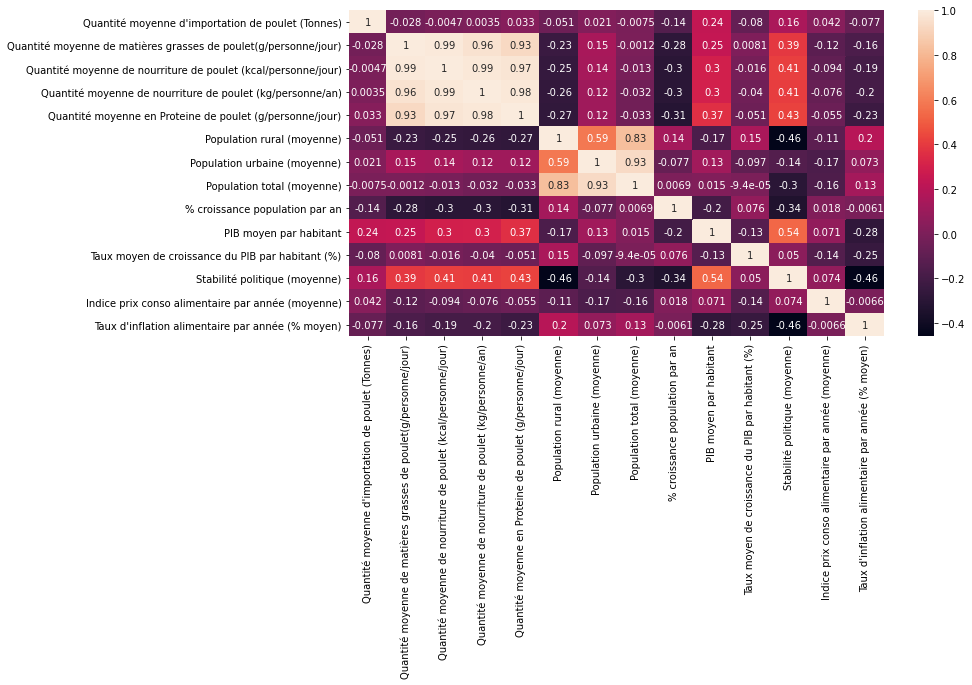

In [139]:
%pylab inline
# Affichage d'une heatmap
plt.figure(figsize=(12,6))
sns.heatmap(correlationMatrix, annot=True)
plt.show()

# ACP

In [140]:
# préparation des données 
# choix du nombre de composantes à calculer
n_comp = 7

selected_variables = ["Quantité moyenne d'importation de poulet (Tonnes)","Quantité moyenne de nourriture de poulet (kcal/personne/jour)", "Population total (moyenne)",
                    "% croissance population par an", "PIB moyen par habitant", "Stabilité politique (moyenne)","Taux d'inflation alimentaire par année (% moyen)"]

df = df[selected_variables]
X = df
pays = df.index
nom_variable = X.columns

In [141]:
# Centrage et Réduction
std_scale = preprocessing.StandardScaler().fit(X)
X_scaled = std_scale.transform(X)

Text(0.5, 1.0, 'Visualisation après standardisation')

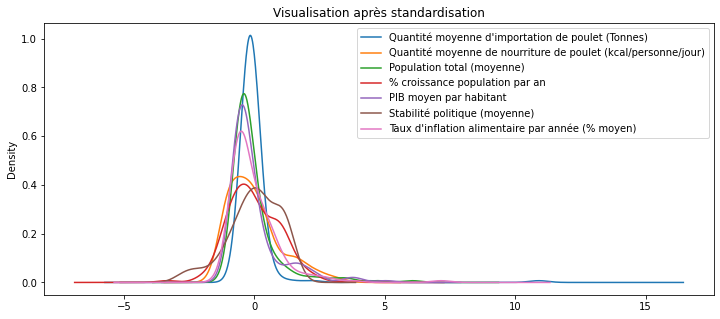

In [142]:
#vérification : visualisation après standardisation (toutes les variables ont une moyenne de 0 et un écart type de 1)
pd.DataFrame(X_scaled, columns = X.columns).plot(kind='density', sharex=True, figsize=(12,5), layout=(10,1))
plt.title('Visualisation après standardisation')

In [143]:
X.head()

,Quantité moyenne d'importation de poulet (Tonnes),Quantité moyenne de nourriture de poulet (kcal/personne/jour),Population total (moyenne),% croissance population par an,PIB moyen par habitant,Stabilité politique (moyenne),Taux d'inflation alimentaire par année (% moyen)
Pays,,,,,,,
Afghanistan,1058,6.83,33815751,3.30,562.45,-2.56,5.32
Albania,3653,66.00,2895885,-0.21,4292.96,0.25,3.51
Algeria,2109,25.83,39352721,2.14,4803.15,-1.14,5.44
Angola,112,41.00,27434854,3.75,4588.71,-0.38,16.81
Antigua and Barbuda,16,256.17,93000,1.11,14091.82,0.93,1.98


In [144]:
# Calcul des composantes principales

pca = decomposition.PCA(n_components=7) #correspond aux 7 variables 
pca.fit(X_scaled)

PCA(n_components=7)

In [145]:
#Variance 
print(pca.explained_variance_)
print(pca.explained_variance_ratio_.cumsum())

[2.37397486 1.15724776 1.02873715 0.94770622 0.63085316 0.60153466
 0.30661286]
[0.33689331 0.50111958 0.64710877 0.78159877 0.87112381 0.95648824
 1.        ]


In [146]:
# Je crée une df qui affiche la variance expliquée pour chaque dimension.
variance = pd.DataFrame(
    {
        "Dimension" : ["Dim" + str(x + 1) for x in range(7)], 
        "Variance expliquée" : pca.explained_variance_,
        "% variance expliquée" : np.round(pca.explained_variance_ratio_ * 100),
        "% cum. var. expliquée" : np.round(np.cumsum(pca.explained_variance_ratio_) * 100)
    }
)
variance

,Dimension,Variance expliquée,% variance expliquée,% cum. var. expliquée
0,Dim1,2.373975,34.0,34.0
1,Dim2,1.157248,16.0,50.0
2,Dim3,1.028737,15.0,65.0
3,Dim4,0.947706,13.0,78.0
4,Dim5,0.630853,9.0,87.0
5,Dim6,0.601535,9.0,96.0
6,Dim7,0.306613,4.0,100.0


In [147]:
def display_scree_plot(pca):
    scree = pca.explained_variance_ratio_*100
    plt.bar(np.arange(len(scree))+1, scree)
    plt.plot(np.arange(len(scree))+1, scree.cumsum(),c="red",marker='o')
    plt.xlabel("rang de l'axe d'inertie")
    plt.ylabel("pourcentage d'inertie")
    plt.title("Eboulis des valeurs propres")
    plt.show(block=False)

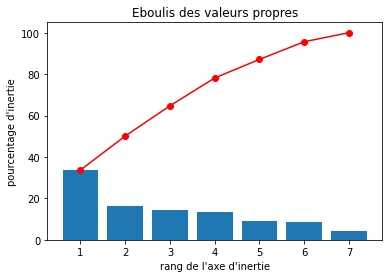

In [148]:
display_scree_plot(pca)

In [149]:
# Calcul des composantes principales
n_comp = 3
pca = decomposition.PCA(n_components=n_comp)
pca.fit(X_scaled)

PCA(n_components=3)

In [150]:
# Fonction qui me permet d'afficher mes cercles de corrélations
def display_circles(pcs, n_comp, pca, axis_ranks, labels=None, label_rotation=0, lims=None):
    for d1, d2 in axis_ranks: # On affiche les 3 premiers plans factoriels, donc les 6 premières composantes
        if d2 < n_comp:

            # initialisation de la figure
            fig, ax = plt.subplots(figsize=(8,8))

            # détermination des limites du graphique
            if lims is not None :
                xmin, xmax, ymin, ymax = lims
            elif pcs.shape[1] < 30 :
                xmin, xmax, ymin, ymax = -1, 1, -1, 1
            else :
                xmin, xmax, ymin, ymax = min(pcs[d1,:]), max(pcs[d1,:]), min(pcs[d2,:]), max(pcs[d2,:])

            # affichage des flèches
            # s'il y a plus de 30 flèches, on n'affiche pas le triangle à leur extrémité
            if pcs.shape[1] < 30 :
                plt.quiver(np.zeros(pcs.shape[1]), np.zeros(pcs.shape[1]),
                   pcs[d1,:], pcs[d2,:], 
                   angles='xy', scale_units='xy', scale=1, color="orange")
                # (voir la doc : https://matplotlib.org/api/_as_gen/matplotlib.pyplot.quiver.html)
            else:
                lines = [[[0,0],[x,y]] for x,y in pcs[[d1,d2]].T]
                ax.add_collection(LineCollection(lines, axes=ax, alpha=.1, color='black'))
            
            # affichage des noms des variables  
            if labels is not None:  
                for i,(x, y) in enumerate(pcs[[d1,d2]].T):
                    if x >= xmin and x <= xmax and y >= ymin and y <= ymax :
                        plt.text(x, y, labels[i], fontsize='14', ha='center', va='center', rotation=label_rotation, color="blue", alpha=0.5)
            
            # affichage du cercle
            circle = plt.Circle((0,0), 1, facecolor='none', edgecolor='b')
            plt.gca().add_artist(circle)

            # définition des limites du graphique
            plt.xlim(xmin, xmax)
            plt.ylim(ymin, ymax)
        
            # affichage des lignes horizontales et verticales
            plt.plot([-1, 1], [0, 0], color='grey', ls='--')
            plt.plot([0, 0], [-1, 1], color='grey', ls='--')

            # nom des axes, avec le pourcentage d'inertie expliqué
            plt.xlabel('F{} ({}%)'.format(d1+1, round(100*pca.explained_variance_ratio_[d1],1)))
            plt.ylabel('F{} ({}%)'.format(d2+1, round(100*pca.explained_variance_ratio_[d2],1)))

            plt.title("Cercle des corrélations (F{} et F{})".format(d1+1, d2+1))
            plt.show(block=False)

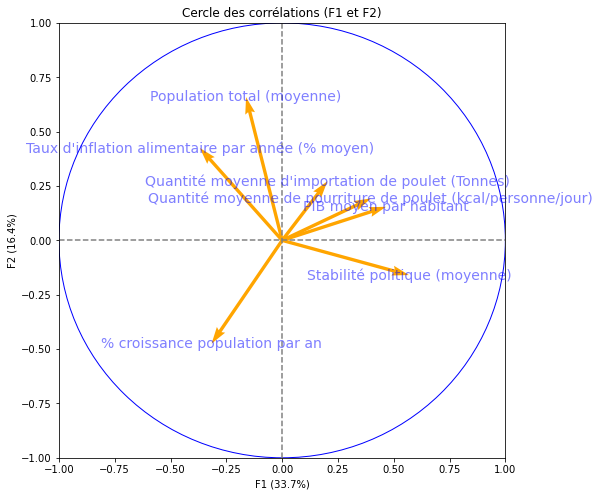

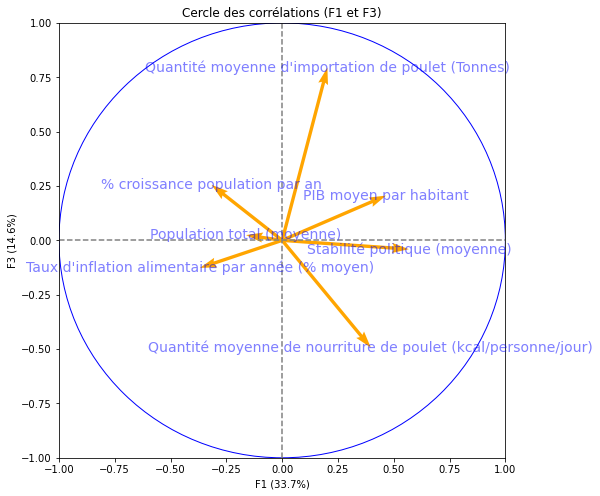

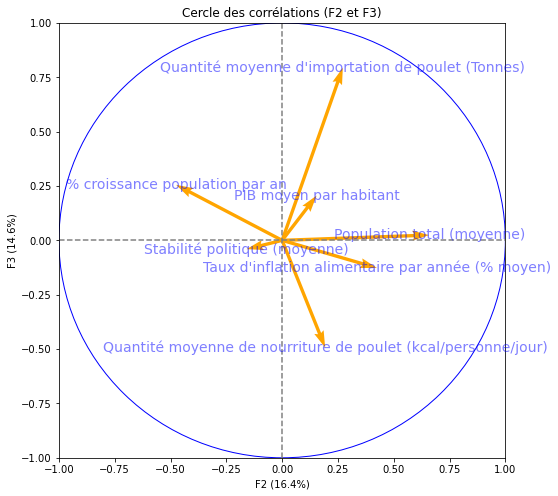

In [151]:
pcs = pca.components_
display_circles(pcs,n_comp , pca, [(0,1),(0,2),(1,2)], labels = np.array(nom_variable))

In [152]:
#Nombre d'observations 
n = df.shape[0]

#Nombre de variables
p = df.shape[1]

#instanciation
pca = decomposition.PCA(svd_solver='full')

#calcul
coord = pca.fit_transform(X_scaled)

#valeur corrigée
eigval = (n-1)/n*pca.explained_variance_ 

#racine carrée des valeurs propres
sqrt_eigval = np.sqrt(eigval)

#corrélation des variables avec les axes
corvar = np.zeros((p,p))
for k in range(p):
    corvar[:,k] = pca.components_[k,:] * sqrt_eigval[k]

#cosinus carré des variables
cos2var = corvar**2

#contributions
ctrvar = cos2var
for k in range(p):
    ctrvar[:,k] = ctrvar[:,k]/eigval[k]
    
#affichage
pd.DataFrame({'variable':df.columns,'F1':ctrvar[:,0],'F2':ctrvar[:,1], 'F3':ctrvar[:,2]})

,variable,F1,F2,F3
0,Quantité moyenne d'importation de poulet (Tonnes),0.041073,0.073917,0.630855
1,Quantité moyenne de nourriture de poulet (kcal...,0.157846,0.037174,0.243232
2,Population total (moyenne),0.026169,0.433626,0.000590
3,% croissance population par an,0.099985,0.225616,0.065199
4,PIB moyen par habitant,0.216687,0.023809,0.042438
5,Stabilité politique (moyenne),0.322271,0.025458,0.001637
6,Taux d'inflation alimentaire par année (% moyen),0.135969,0.180401,0.016050


In [153]:
# Fonction qui permet de projeter les individus sur les dimensions 
def display_factorial_planes(X_projected, n_comp, pca, axis_ranks, labels=None, alpha=1, illustrative_var=None):
    for d1,d2 in axis_ranks:
        if d2 < n_comp:
 
            # initialisation de la figure       
            fig = plt.figure(figsize=(8,8))
        
            # affichage des points
            if illustrative_var is None:
                plt.scatter(X_projected[:, d1], X_projected[:, d2], alpha=alpha)
            else:
                illustrative_var = np.array(illustrative_var)
                for value in np.unique(illustrative_var):
                    selected = np.where(illustrative_var == value)
                    plt.scatter(X_projected[selected, d1], X_projected[selected, d2], alpha=alpha, label=value)
                plt.legend()

            # affichage des labels des points
            if labels is not None:
                for i,(x,y) in enumerate(X_projected[:,[d1,d2]]):
                    plt.text(x, y, labels[i],
                              fontsize='14', ha='center',va='center') 
                
            # détermination des limites du graphique
            boundary = np.max(np.abs(X_projected[:, [d1,d2]])) * 1.1
            plt.xlim([-boundary,boundary])
            plt.ylim([-boundary,boundary])
        
            # affichage des lignes horizontales et verticales
            plt.plot([-100, 100], [0, 0], color='grey', ls='--')
            plt.plot([0, 0], [-100, 100], color='grey', ls='--')

            # nom des axes, avec le pourcentage d'inertie expliqué
            plt.xlabel('F{} ({}%)'.format(d1+1, round(100*pca.explained_variance_ratio_[d1],1)))
            plt.ylabel('F{} ({}%)'.format(d2+1, round(100*pca.explained_variance_ratio_[d2],1)))

            plt.title("Projection des individus (sur F{} et F{})".format(d1+1, d2+1))
            plt.show(block=False)

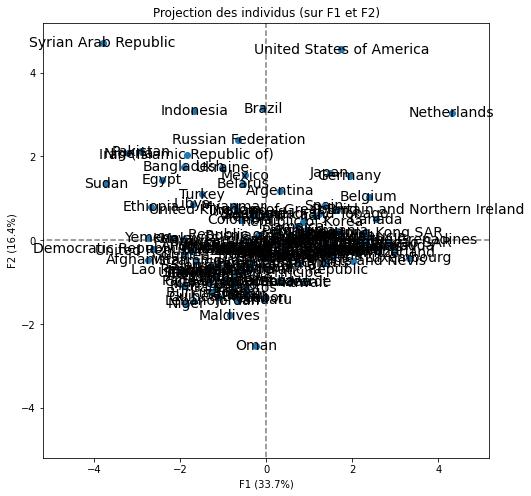

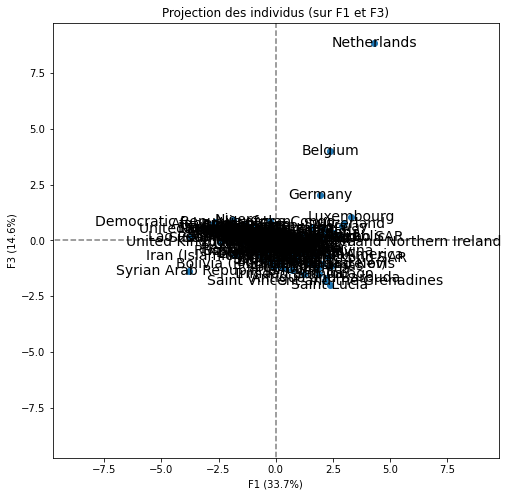

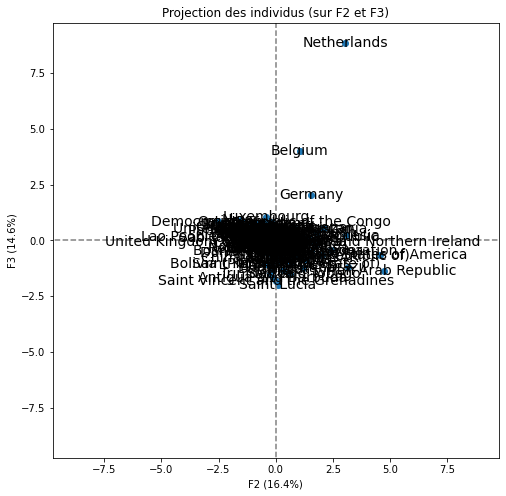

<Figure size 432x288 with 0 Axes>

In [154]:
# Projection des individus
X_projected = pca.transform(X_scaled)
display_factorial_planes(X_projected, n_comp, pca, [(0,1),(0,2),(1,2)], labels = np.array(pays))
plt.figure()
plt.show()

# Classification ascendante hiérarchique

In [155]:
# Affichage d'un dendrogramme

def plot_dendrogram(Z, pays):
    plt.figure(figsize=(10,25))
    plt.title('Hierarchical Clustering Dendrogram')
    plt.xlabel('distance')
    dendrogram(Z,labels = pays,orientation = "left",)

# Préparation des données pour le clustering
dendrogramme=df
X = dendrogramme.values
names = dendrogramme.index

In [156]:
# Centrage et Réduction
std_scale = preprocessing.StandardScaler().fit(X)
X_scaled = std_scale.transform(X)

In [157]:
# Clustering hiérarchique
Z = linkage(X_scaled,method='ward',metric='euclidean')

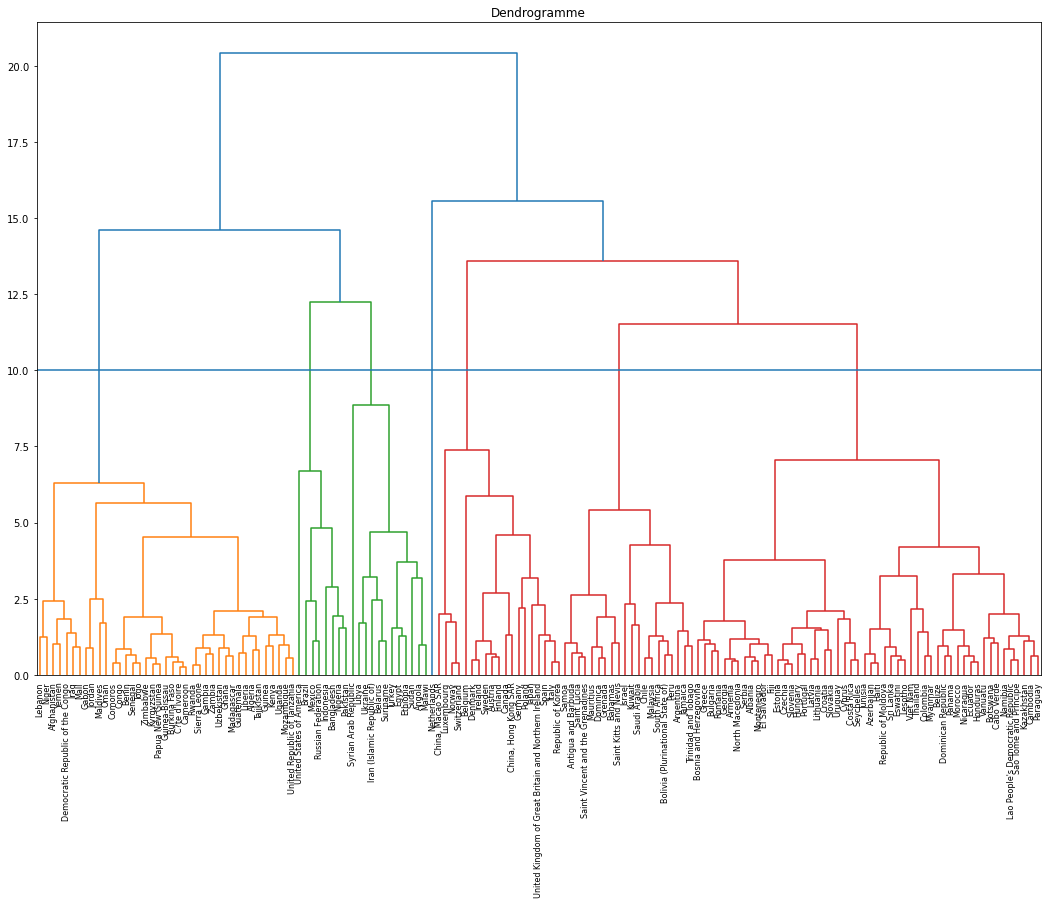

In [158]:
# Affichage du dendrogramme
plt.figure(figsize=(18, 12))
plt.axhline(10)
plt.title("Dendrogramme")
dendrogram(Z,labels=df.index,show_leaf_counts=True, leaf_font_size=8.)
plt.show()


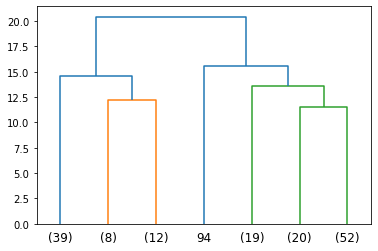

In [159]:
dendrogram(Z,truncate_mode="lastp",p=7)
plt.show()

In [160]:


# Création d'une colonne "cluster"
clusters = fcluster(Z, 7, criterion='maxclust')

# Création d'un df avec une colonne cluster et une colonne zone
groupes = pd.DataFrame({"cluster": clusters, "Pays": pays})

print(groupes)


     cluster                 Pays
0          1          Afghanistan
1          6              Albania
2          1              Algeria
3          3               Angola
4          5  Antigua and Barbuda
..       ...                  ...
146        6              Vanuatu
147        6             Viet Nam
148        1                Yemen
149        1               Zambia
150        1             Zimbabwe

[151 rows x 2 columns]


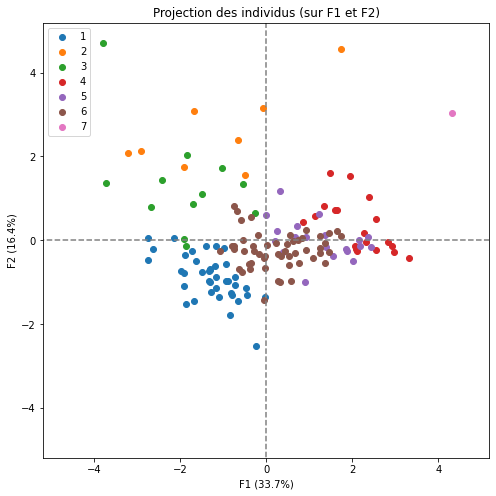

In [161]:


# Projection des individus sur F1 et F2
X_projected = pca.transform(X_scaled)
display_factorial_planes(X_projected, n_comp, pca, [(0,1)],
                         labels=None, illustrative_var=clusters)
plt.show()

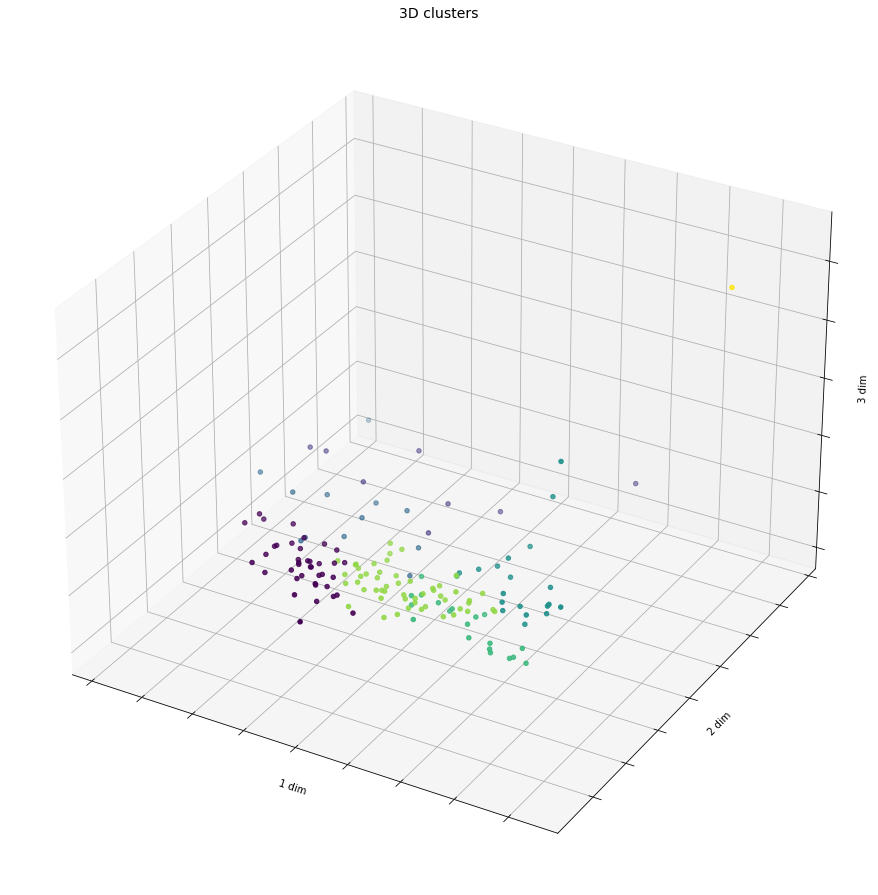

In [162]:
#Aperçu sur un Graph 3D des clusters

x_reduced = X_projected
fig = plt.figure(figsize=(12, 12))
axes = Axes3D(fig)
axes.set_title("3D clusters", size=14)
axes.set_xlabel("1 dim")
axes.set_ylabel("2 dim")
axes.set_zlabel("3 dim")
axes.w_xaxis.set_ticklabels(())
axes.w_yaxis.set_ticklabels(())
axes.w_zaxis.set_ticklabels(())
axes.scatter(x_reduced[:,0],x_reduced[:,1],x_reduced[:,2], c=groupes["cluster"]);

La visualisation sur un graphique en 3D n'apporte rien de plus

In [163]:
# Je tri les pays par cluster
groupes.sort_values(by=['cluster']).head()

,cluster,Pays
0,1,Afghanistan
49,1,Gambia
52,1,Ghana
55,1,Guatemala
56,1,Guinea


In [164]:
# Affichage du nombre de pays par cluster
groupes['cluster'].value_counts()


6    52
1    39
5    20
4    19
3    12
2     8
7     1
Name: cluster, dtype: int64

In [165]:
# Mise à l'échelle des données
df_scaled = pd.DataFrame(X_scaled, columns= list(nom_variable), index=df.index)

In [166]:
df_scaled.head()


,Quantité moyenne d'importation de poulet (Tonnes),Quantité moyenne de nourriture de poulet (kcal/personne/jour),Population total (moyenne),% croissance population par an,PIB moyen par habitant,Stabilité politique (moyenne),Taux d'inflation alimentaire par année (% moyen)
Pays,,,,,,,
Afghanistan,-0.159267,-1.109929,0.122487,1.326230,-0.668110,-2.653868,0.041647
Albania,-0.101855,-0.135893,-0.518558,-1.169829,-0.471767,0.405337,-0.261970
Algeria,-0.136015,-0.797157,0.237282,0.501322,-0.444915,-1.107935,0.061777
Angola,-0.180197,-0.547434,-0.009804,1.646238,-0.456201,-0.280535,1.969031
Antigua and Barbuda,-0.182321,2.994620,-0.576668,-0.231140,0.043963,1.145643,-0.518619


In [167]:
# Jointure de la colonne cluster dans df_final
df_final_clusters = pd.merge(df_scaled, groupes, on='Pays')

In [168]:
df_final_clusters.head()

,Pays,Quantité moyenne d'importation de poulet (Tonnes),Quantité moyenne de nourriture de poulet (kcal/personne/jour),Population total (moyenne),% croissance population par an,PIB moyen par habitant,Stabilité politique (moyenne),Taux d'inflation alimentaire par année (% moyen),cluster
0,Afghanistan,-0.159267,-1.109929,0.122487,1.326230,-0.668110,-2.653868,0.041647,1
1,Albania,-0.101855,-0.135893,-0.518558,-1.169829,-0.471767,0.405337,-0.261970,6
2,Algeria,-0.136015,-0.797157,0.237282,0.501322,-0.444915,-1.107935,0.061777,1
3,Angola,-0.180197,-0.547434,-0.009804,1.646238,-0.456201,-0.280535,1.969031,3
4,Antigua and Barbuda,-0.182321,2.994620,-0.576668,-0.231140,0.043963,1.145643,-0.518619,5


In [169]:
# Calcul de la moyenne des variables pour chaque cluster 
df_final_clusters_moy = df_final_clusters.groupby('cluster').agg(['mean'])

In [170]:
df_final_clusters_moy.head()

,Quantité moyenne d'importation de poulet (Tonnes),Quantité moyenne de nourriture de poulet (kcal/personne/jour),Population total (moyenne),% croissance population par an,PIB moyen par habitant,Stabilité politique (moyenne),Taux d'inflation alimentaire par année (% moyen)
,mean,mean,mean,mean,mean,mean,mean
cluster,,,,,,,
1,-0.171552,-0.791894,-0.196035,1.157930,-0.567199,-0.647059,-0.037709
2,-0.155551,0.154923,3.509677,-0.084470,-0.056009,-0.895642,0.266215
3,-0.088158,-0.263704,0.301196,-0.072322,-0.461188,-1.160555,2.484845
4,0.408301,0.223379,0.048049,-0.524200,2.057197,1.104387,-0.565588
5,-0.176572,1.896027,-0.333436,-0.195584,0.059167,0.512028,-0.242512


<Figure size 432x288 with 0 Axes>

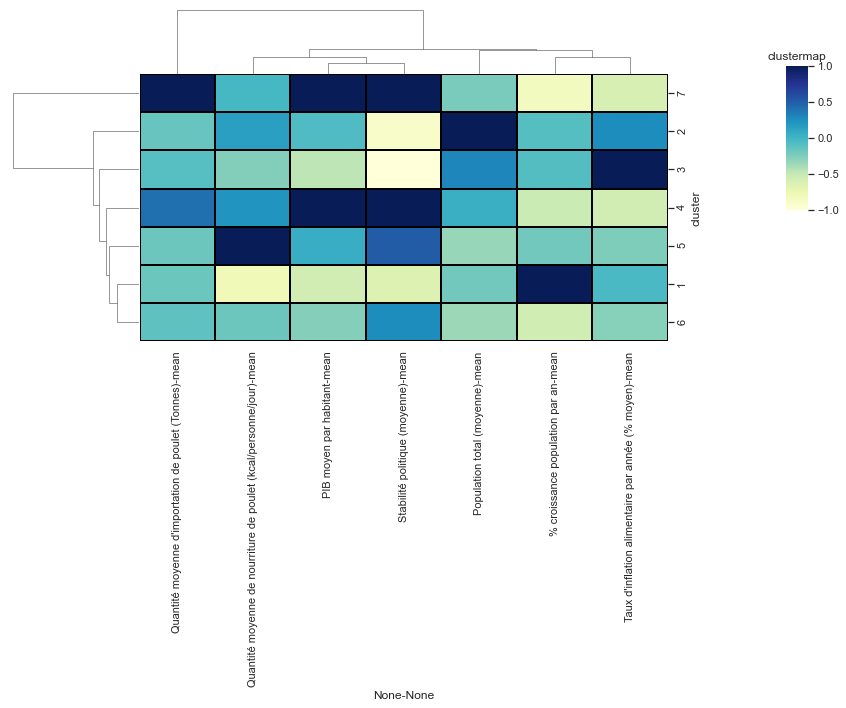

In [171]:
# Création d'une clustermap
plt.figure()
sns.set(rc={'figure.figsize':(13,10)})
sns.clustermap(df_final_clusters_moy,cmap ="YlGnBu", linecolor='black',linewidths=1,vmin=-1, vmax=1,cbar_pos=(1.1, 0.7, .03, .2))
plt.title('clustermap')
plt.show()

# Diagrammes de Kiviat

In [172]:
den_1 = pd.DataFrame({'Col A': ["Quantité moyenne d'importation de poulet (Tonnes)","Quantité moyenne de nourriture de poulet (kcal/personne/jour)", "Population total (moyenne)",
                    "% croissance population par an", "PIB moyen par habitant", "Stabilité politique (moyenne)","Taux d'inflation alimentaire par année (% moyen)"], 'Col B':df_final_clusters_moy.iloc[0].values});
den_2 = pd.DataFrame({'Col A': ["Quantité moyenne d'importation de poulet (Tonnes)","Quantité moyenne de nourriture de poulet (kcal/personne/jour)", "Population total (moyenne)",
                    "% croissance population par an", "PIB moyen par habitant", "Stabilité politique (moyenne)","Taux d'inflation alimentaire par année (% moyen)"], 'Col B':df_final_clusters_moy.iloc[1].values});
den_3 = pd.DataFrame({'Col A': ["Quantité moyenne d'importation de poulet (Tonnes)","Quantité moyenne de nourriture de poulet (kcal/personne/jour)", "Population total (moyenne)",
                    "% croissance population par an", "PIB moyen par habitant", "Stabilité politique (moyenne)","Taux d'inflation alimentaire par année (% moyen)"], 'Col B':df_final_clusters_moy.iloc[2].values});
den_4 = pd.DataFrame({'Col A': ["Quantité moyenne d'importation de poulet (Tonnes)","Quantité moyenne de nourriture de poulet (kcal/personne/jour)", "Population total (moyenne)",
                    "% croissance population par an", "PIB moyen par habitant", "Stabilité politique (moyenne)","Taux d'inflation alimentaire par année (% moyen)"], 'Col B':df_final_clusters_moy.iloc[3].values});
den_5 = pd.DataFrame({'Col A': ["Quantité moyenne d'importation de poulet (Tonnes)","Quantité moyenne de nourriture de poulet (kcal/personne/jour)", "Population total (moyenne)",
                    "% croissance population par an", "PIB moyen par habitant", "Stabilité politique (moyenne)","Taux d'inflation alimentaire par année (% moyen)"], 'Col B':df_final_clusters_moy.iloc[4].values});
den_6 = pd.DataFrame({'Col A': ["Quantité moyenne d'importation de poulet (Tonnes)","Quantité moyenne de nourriture de poulet (kcal/personne/jour)", "Population total (moyenne)",
                    "% croissance population par an", "PIB moyen par habitant", "Stabilité politique (moyenne)","Taux d'inflation alimentaire par année (% moyen)"], 'Col B':df_final_clusters_moy.iloc[5].values});
den_7 = pd.DataFrame({'Col A': ["Quantité moyenne d'importation de poulet (Tonnes)","Quantité moyenne de nourriture de poulet (kcal/personne/jour)", "Population total (moyenne)",
                    "% croissance population par an", "PIB moyen par habitant", "Stabilité politique (moyenne)","Taux d'inflation alimentaire par année (% moyen)"], 'Col B':df_final_clusters_moy.iloc[6].values});

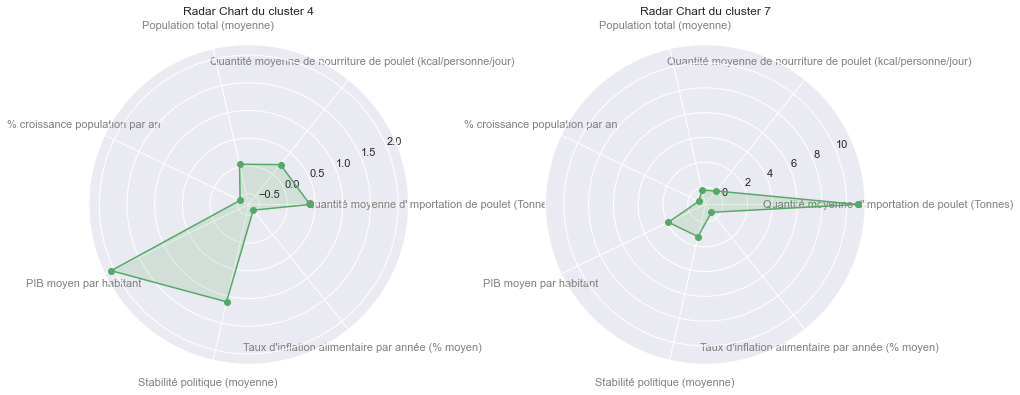

In [173]:
#Commençons par afficher les 2 clusters qui ont le plus d'importation de poulet

fig = plt.figure(figsize=(15, 20))
fig.tight_layout()
ax = fig.add_subplot(321, projection="polar")
# #theta a des angles différents, et le premier est répété
theta = np.arange(len(den_4) + 1) / float(len(den_4)) * 2 * np.pi
##les valeurs ont les 5 valeurs de 'Col B', avec le premier élément répété
values = den_4['Col B'].values
values = np.append(values, values[0])
#dessiner le polygone et marquer les points pour chaque combinaison angle/valeur
l1, = ax.plot(theta, values, color="C2", marker="o", label="Name of Col B")
plt.xticks(theta[:-1], den_4['Col A'], color='grey', size=11)
ax.tick_params(pad=10) #pour augmenter la distance des étiquettes au tracé
# remplit la zone du polygone de vert et de transparence
ax.fill(theta, values, 'green', alpha=0.1)
#plt.legend() #affiche la légende, en utilisant l’étiquette du tracé de ligne (utile lorsqu’il y a plus d’un polygone)
plt.title("Radar Chart du cluster 4")

ax = fig.add_subplot(322, projection="polar")
theta = np.arange(len(den_7) + 1) / float(len(den_7)) * 2 * np.pi
values = den_7['Col B'].values
values = np.append(values, values[0])
l1, = ax.plot(theta, values, color="C2", marker="o", label="Name of Col B")
plt.xticks(theta[:-1], den_7['Col A'], color='grey', size=11)
ax.tick_params(pad=10)
ax.fill(theta, values, 'green', alpha=0.1)
plt.title("Radar Chart du cluster 7")
plt.show()

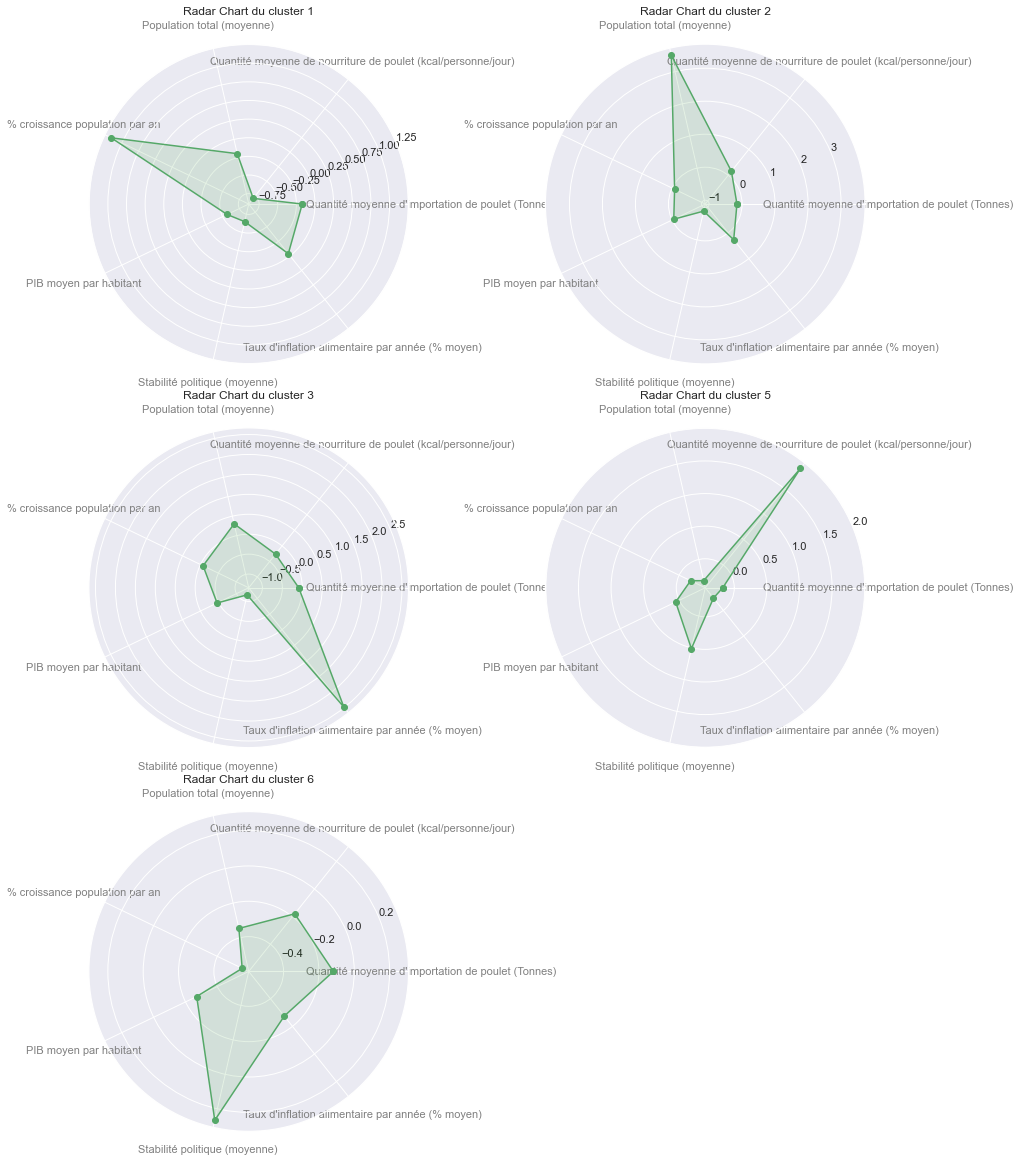

In [174]:
#On continue avec les 5 autres clusters

fig = plt.figure(figsize=(15, 20))
fig.tight_layout()
ax = fig.add_subplot(321, projection="polar")
# #theta a des angles différents, et le premier est répété
theta = np.arange(len(den_1) + 1) / float(len(den_1)) * 2 * np.pi
##les valeurs ont les 5 valeurs de 'Col B', avec le premier élément répété
values = den_1['Col B'].values
values = np.append(values, values[0])
#dessiner le polygone et marquer les points pour chaque combinaison angle/valeur
l1, = ax.plot(theta, values, color="C2", marker="o", label="Name of Col B")
plt.xticks(theta[:-1], den_1['Col A'], color='grey', size=11)
ax.tick_params(pad=10) #pour augmenter la distance des étiquettes au tracé
# remplit la zone du polygone de vert et de transparence
ax.fill(theta, values, 'green', alpha=0.1)
#plt.legend() #affiche la légende, en utilisant l’étiquette du tracé de ligne (utile lorsqu’il y a plus d’un polygone)
plt.title("Radar Chart du cluster 1")

ax = fig.add_subplot(322, projection="polar")
theta = np.arange(len(den_2) + 1) / float(len(den_2)) * 2 * np.pi
values = den_2['Col B'].values
values = np.append(values, values[0])
l1, = ax.plot(theta, values, color="C2", marker="o", label="Name of Col B")
plt.xticks(theta[:-1], den_2['Col A'], color='grey', size=11)
ax.tick_params(pad=10)
ax.fill(theta, values, 'green', alpha=0.1)
plt.title("Radar Chart du cluster 2")

ax = fig.add_subplot(323, projection="polar")
theta = np.arange(len(den_3) + 1) / float(len(den_3)) * 2 * np.pi
values = den_3['Col B'].values
values = np.append(values, values[0])
l1, = ax.plot(theta, values, color="C2", marker="o", label="Name of Col B")
plt.xticks(theta[:-1], den_3['Col A'], color='grey', size=11)
ax.tick_params(pad=10) 
ax.fill(theta, values, 'green', alpha=0.1)
plt.title("Radar Chart du cluster 3")


ax = fig.add_subplot(324, projection="polar")
theta = np.arange(len(den_5) + 1) / float(len(den_5)) * 2 * np.pi
values = den_5['Col B'].values
values = np.append(values, values[0])
l1, = ax.plot(theta, values, color="C2", marker="o", label="Name of Col B")
plt.xticks(theta[:-1], den_5['Col A'], color='grey', size=11)
ax.tick_params(pad=10)
ax.fill(theta, values, 'green', alpha=0.1)
plt.title("Radar Chart du cluster 5")

ax = fig.add_subplot(325, projection="polar")
theta = np.arange(len(den_6) + 1) / float(len(den_6)) * 2 * np.pi
values = den_6['Col B'].values
values = np.append(values, values[0])
l1, = ax.plot(theta, values, color="C2", marker="o", label="Name of Col B")
plt.xticks(theta[:-1], den_6['Col A'], color='grey', size=11)
ax.tick_params(pad=10)
ax.fill(theta, values, 'green', alpha=0.1)
plt.title("Radar Chart du cluster 6")
plt.show()

In [175]:
# Aperçu des pays du cluster 4 
cluster_4 = df_final_clusters.loc[df_final_clusters['cluster']==4]

cluster_4.sort_values("Quantité moyenne d'importation de poulet (Tonnes)", ascending=False)

,Pays,Quantité moyenne d'importation de poulet (Tonnes),Quantité moyenne de nourriture de poulet (kcal/personne/jour),Population total (moyenne),% croissance population par an,PIB moyen par habitant,Stabilité politique (moyenne),Taux d'inflation alimentaire par année (% moyen),cluster
12,Belgium,4.446140,-0.530972,-0.345278,-0.593815,1.635949,0.862585,-0.547136,4
51,Germany,2.242321,-0.144123,1.115373,-0.721819,1.626903,0.971453,-0.501845,4
106,Poland,1.372351,0.539035,0.210801,-1.120050,0.002401,0.993227,-0.609201,4
25,Canada,0.768469,1.227626,0.164402,-0.280919,1.805565,1.396040,-0.567265,4
126,Spain,0.446650,0.448496,0.391424,-1.148495,0.762429,0.340016,-0.610879,4
7,Austria,0.275695,-0.130460,-0.399193,-0.487146,1.813223,1.417814,-0.498490,4
141,United Kingdom of Great Britain and Northern I...,-0.001875,0.681758,0.782206,-0.536925,1.553585,0.590413,-0.735010,4
64,Ireland,-0.076633,0.388082,-0.482011,-0.572482,2.410147,1.156530,-1.023530,4
28,"China, Macao SAR",-0.088337,1.142684,-0.566264,0.458654,3.602961,1.341606,0.004744,4
66,Italy,-0.089576,-0.163384,0.673545,-0.828488,1.054456,0.590413,-0.622621,4


In [176]:
# Aperçu des pays du cluster 7
cluster_7 = df_final_clusters.loc[df_final_clusters['cluster']==7]

cluster_7

,Pays,Quantité moyenne d'importation de poulet (Tonnes),Quantité moyenne de nourriture de poulet (kcal/personne/jour),Population total (moyenne),% croissance population par an,PIB moyen par habitant,Stabilité politique (moyenne),Taux d'inflation alimentaire par année (% moyen),cluster
94,Netherlands,10.901954,-0.017863,-0.227979,-0.828488,1.890706,1.243624,-0.609201,7


In [177]:
#on garde les 2 meilleurs clusters pour plus tard
best_cluster_acp = cluster_7.append(cluster_4)
best_cluster_acp = best_cluster_acp.drop(["cluster"], axis=1)
best_cluster_acp.set_index('Pays', inplace = True)

best_cluster_acp.head(10).sort_values("Quantité moyenne d'importation de poulet (Tonnes)", ascending=False)

,Quantité moyenne d'importation de poulet (Tonnes),Quantité moyenne de nourriture de poulet (kcal/personne/jour),Population total (moyenne),% croissance population par an,PIB moyen par habitant,Stabilité politique (moyenne),Taux d'inflation alimentaire par année (% moyen)
Pays,,,,,,,
Netherlands,10.901954,-0.017863,-0.227979,-0.828488,1.890706,1.243624,-0.609201
Belgium,4.446140,-0.530972,-0.345278,-0.593815,1.635949,0.862585,-0.547136
Germany,2.242321,-0.144123,1.115373,-0.721819,1.626903,0.971453,-0.501845
Canada,0.768469,1.227626,0.164402,-0.280919,1.805565,1.396040,-0.567265
Austria,0.275695,-0.130460,-0.399193,-0.487146,1.813223,1.417814,-0.498490
Ireland,-0.076633,0.388082,-0.482011,-0.572482,2.410147,1.156530,-1.023530
"China, Macao SAR",-0.088337,1.142684,-0.566264,0.458654,3.602961,1.341606,0.004744
Denmark,-0.127829,0.193340,-0.460955,-0.714707,2.350831,1.123869,-0.632685
"China, Hong Kong SAR",-0.153050,1.600812,-0.429992,-0.494258,1.504609,1.167416,-0.221712


# Kmeans

In [178]:
# Je reprend mes données réduites et je les renomme
Y = X_scaled

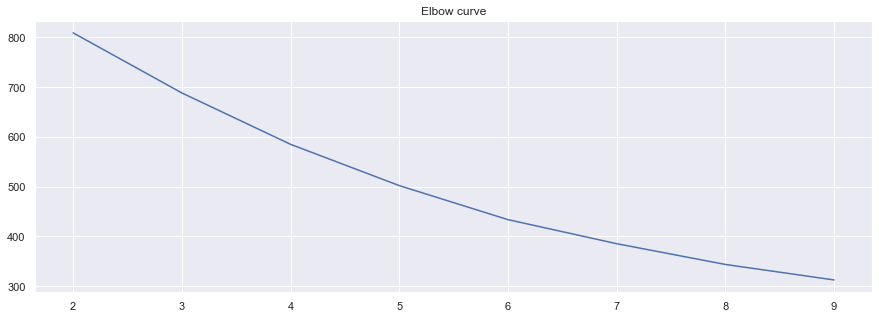

In [179]:

# Création de la courbe en coude
silhouette = []
for k in range(2, 10):
    kmeans = KMeans(n_clusters=k) # création d'un objet de clustering
    kmeans.fit(Y) # clustering sur les données normalisées
    silhouette.append(kmeans.inertia_) # calcul du coefficient de silhouette

fig = plt.figure(figsize=(15, 5))
plt.plot(range(2, 10), silhouette)
plt.grid(True)
plt.title('Elbow curve')
plt.show()

In [180]:
#Création d'une PCA pour projeter les données et observer les clusters avec le module decomposition
pca = decomposition.PCA(n_components=7).fit(Y)
Y_projected = pca.transform(Y)

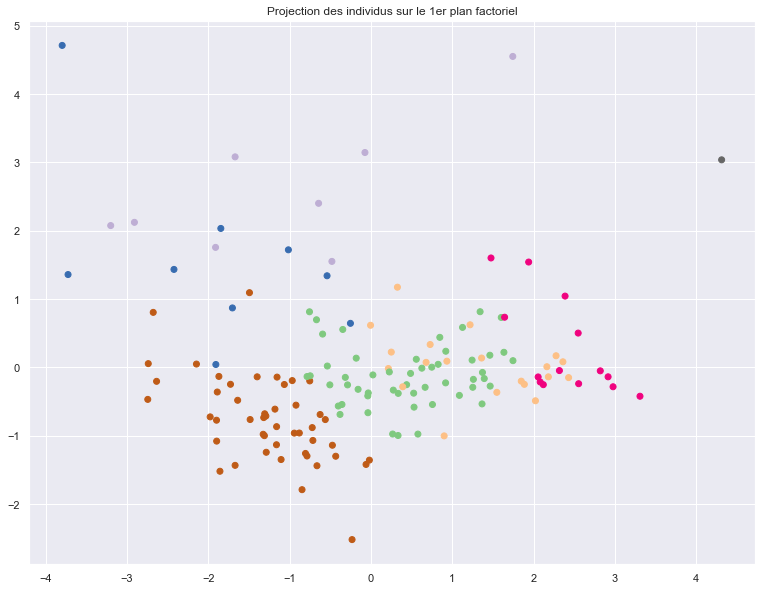

In [181]:
# Clustering par K-means
km = KMeans(n_clusters=7, random_state=3)
km.fit(Y)
# Récupération des clusters attribués à chaque individu
clusters = km.labels_
# Affichage du clustering par projection des individus sur le premier plan factoriel
plt.scatter(Y_projected[:, 0], Y_projected[:, 1], c=km.labels_,cmap='Accent')
plt.title("Projection des individus sur le 1er plan factoriel")
#plt.legend()
plt.show()

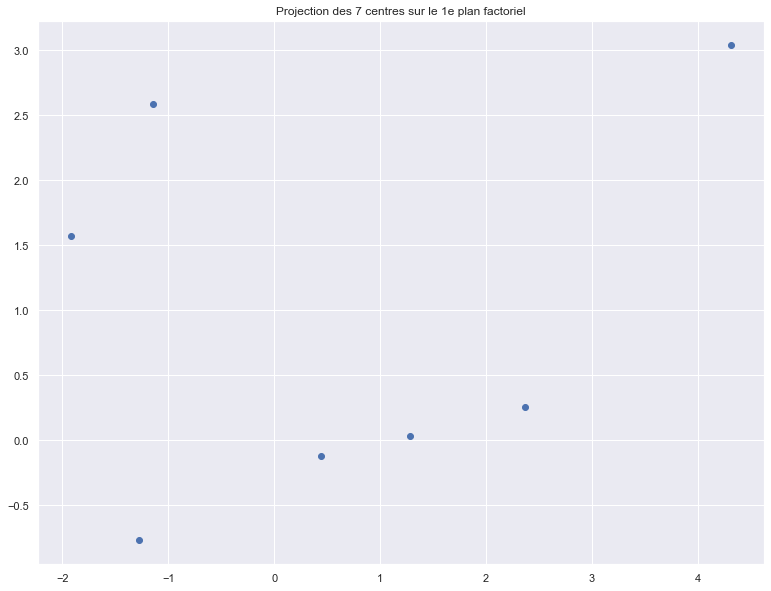

In [182]:
# Affichage des positions des centres de classes
plt.figure()
centroids = km.cluster_centers_
centroids_projected = pca.transform(centroids)
plt.scatter(centroids_projected[:,0],centroids_projected[:,1])
plt.title("Projection des {} centres sur le 1e plan factoriel".format(len(centroids)))
plt.show()

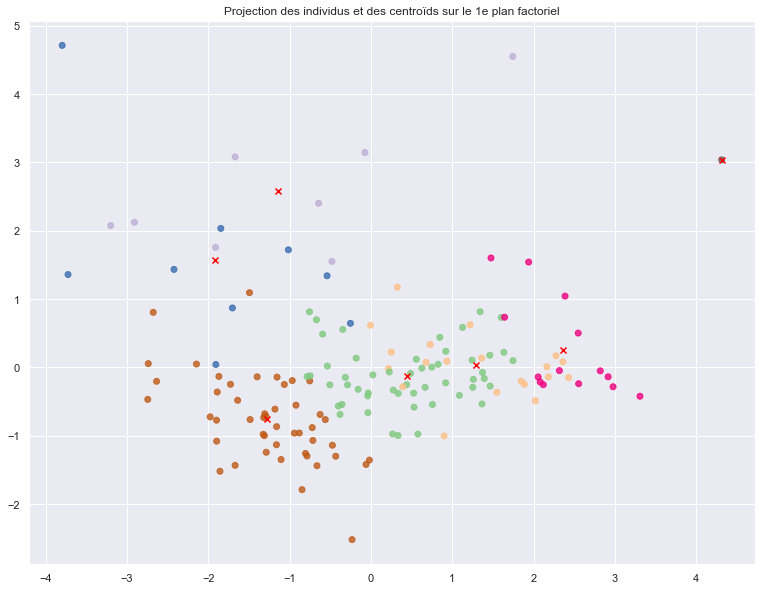

In [183]:

# Création d'un graphique avec la projection des individus et des centres des clusters
plt.scatter(Y_projected[:, 0], Y_projected[:, 1], c=clusters.astype(float),cmap='Accent', alpha=.8)
plt.scatter(centroids_projected[:,0],centroids_projected[:,1], c='red', marker='x')
plt.title("Projection des individus et des centroïds sur le 1e plan factoriel".format(len(centroids)))
plt.show()

In [184]:
#mise à l'échelle des données
df_k_scaled = pd.DataFrame(X_scaled, columns= list(nom_variable), index=df.index)

In [185]:
df_k_scaled.head()

,Quantité moyenne d'importation de poulet (Tonnes),Quantité moyenne de nourriture de poulet (kcal/personne/jour),Population total (moyenne),% croissance population par an,PIB moyen par habitant,Stabilité politique (moyenne),Taux d'inflation alimentaire par année (% moyen)
Pays,,,,,,,
Afghanistan,-0.159267,-1.109929,0.122487,1.326230,-0.668110,-2.653868,0.041647
Albania,-0.101855,-0.135893,-0.518558,-1.169829,-0.471767,0.405337,-0.261970
Algeria,-0.136015,-0.797157,0.237282,0.501322,-0.444915,-1.107935,0.061777
Angola,-0.180197,-0.547434,-0.009804,1.646238,-0.456201,-0.280535,1.969031
Antigua and Barbuda,-0.182321,2.994620,-0.576668,-0.231140,0.043963,1.145643,-0.518619


In [186]:
# Regroupement des clusters par pays
clusters = km.labels_
df_clusters = pd.DataFrame(index=[df.index])
df_clusters['Clusters'] = clusters
df_clusters = df_clusters.reset_index()
df_clusters.head()

,Pays,Clusters
0,Afghanistan,5
1,Albania,0
2,Algeria,5
3,Angola,5
4,Antigua and Barbuda,2


In [187]:
# Jointure de mes fichiers
df_k = pd.merge(df_k_scaled,df_clusters, on='Pays')

In [188]:
df_k = df_k.sort_values('Clusters')

In [189]:
df_k.head()

,Pays,Quantité moyenne d'importation de poulet (Tonnes),Quantité moyenne de nourriture de poulet (kcal/personne/jour),Population total (moyenne),% croissance population par an,PIB moyen par habitant,Stabilité politique (moyenne),Taux d'inflation alimentaire par année (% moyen),Clusters
75,Latvia,-0.166414,-0.059017,-0.536930,-1.831178,0.070101,0.666621,-0.605846,0
70,Kazakhstan,-0.136391,-0.251124,-0.217288,0.110201,-0.114117,-0.008363,0.355329,0
34,Cyprus,-0.180064,0.242725,-0.554609,-0.458701,0.688660,0.753716,-0.874238,0
35,Czechia,0.044475,0.045186,-0.358762,-0.942268,0.322178,1.232738,-0.374359,0
90,Morocco,-0.154289,-0.105768,0.135019,-0.017802,-0.537303,-0.302308,-0.604169,0


In [190]:
df_k_moy = df_k.groupby('Clusters').agg(['mean'])

In [191]:
df_k_moy

,Quantité moyenne d'importation de poulet (Tonnes),Quantité moyenne de nourriture de poulet (kcal/personne/jour),Population total (moyenne),% croissance population par an,PIB moyen par habitant,Stabilité politique (moyenne),Taux d'inflation alimentaire par année (% moyen)
,mean,mean,mean,mean,mean,mean,mean
Clusters,,,,,,,
0,-0.075485,-0.078062,-0.283116,-0.674638,-0.169058,0.328501,-0.333971
1,-0.155551,0.154923,3.509677,-0.084470,-0.056009,-0.895642,0.266215
2,-0.175194,1.929634,-0.327311,-0.175672,0.143574,0.513117,-0.236809
3,-0.060891,-0.146574,0.122629,-0.422355,-0.479939,-1.182934,2.877461
4,0.454132,0.138276,-0.028887,-0.402827,2.496469,1.251401,-0.584399
5,-0.171027,-0.773866,-0.154903,1.054035,-0.556472,-0.602044,0.060991
6,10.901954,-0.017863,-0.227979,-0.828488,1.890706,1.243624,-0.609201


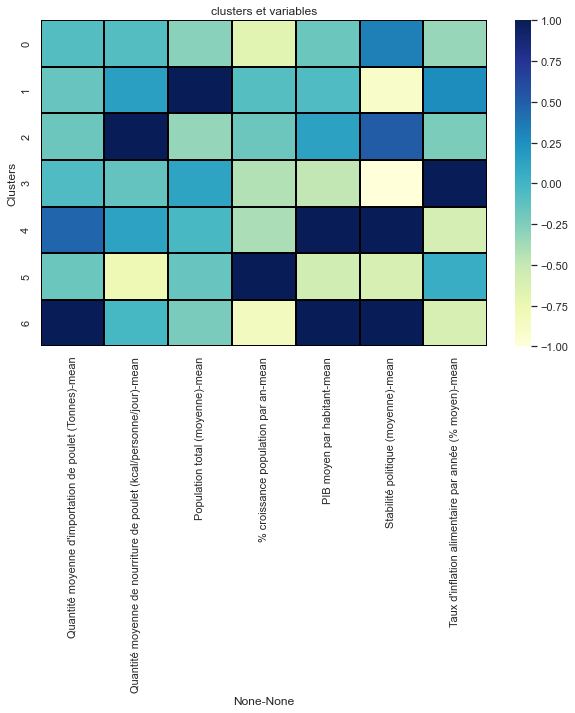

In [192]:

plt.figure(figsize=(10, 6))
sns.heatmap(df_k_moy,cmap ="YlGnBu", linecolor='black',linewidths=1,vmin=-1, vmax=1 )
plt.title('clusters et variables')
plt.show()

In [193]:
dk1 = pd.DataFrame({'Col A': ["Quantité moyenne d'importation de poulet (Tonnes)","Quantité moyenne de nourriture de poulet (kcal/personne/jour)", "Population total (moyenne)",
                    "% croissance population par an", "PIB moyen par habitant", "Stabilité politique (moyenne)","Taux d'inflation alimentaire par année (% moyen)"], 'Col B':df_k_moy.iloc[0].values});
dk2 = pd.DataFrame({'Col A': ["Quantité moyenne d'importation de poulet (Tonnes)","Quantité moyenne de nourriture de poulet (kcal/personne/jour)", "Population total (moyenne)",
                    "% croissance population par an", "PIB moyen par habitant", "Stabilité politique (moyenne)","Taux d'inflation alimentaire par année (% moyen)"], 'Col B':df_k_moy.iloc[1].values});
dk3 = pd.DataFrame({'Col A': ["Quantité moyenne d'importation de poulet (Tonnes)","Quantité moyenne de nourriture de poulet (kcal/personne/jour)", "Population total (moyenne)",
                    "% croissance population par an", "PIB moyen par habitant", "Stabilité politique (moyenne)","Taux d'inflation alimentaire par année (% moyen)"], 'Col B':df_k_moy.iloc[2].values});
dk4 = pd.DataFrame({'Col A': ["Quantité moyenne d'importation de poulet (Tonnes)","Quantité moyenne de nourriture de poulet (kcal/personne/jour)", "Population total (moyenne)",
                    "% croissance population par an", "PIB moyen par habitant", "Stabilité politique (moyenne)","Taux d'inflation alimentaire par année (% moyen)"], 'Col B':df_k_moy.iloc[3].values});
dk5 = pd.DataFrame({'Col A': ["Quantité moyenne d'importation de poulet (Tonnes)","Quantité moyenne de nourriture de poulet (kcal/personne/jour)", "Population total (moyenne)",
                    "% croissance population par an", "PIB moyen par habitant", "Stabilité politique (moyenne)","Taux d'inflation alimentaire par année (% moyen)"], 'Col B':df_k_moy.iloc[4].values});
dk6 = pd.DataFrame({'Col A': ["Quantité moyenne d'importation de poulet (Tonnes)","Quantité moyenne de nourriture de poulet (kcal/personne/jour)", "Population total (moyenne)",
                    "% croissance population par an", "PIB moyen par habitant", "Stabilité politique (moyenne)","Taux d'inflation alimentaire par année (% moyen)"], 'Col B':df_k_moy.iloc[5].values});
dk7 = pd.DataFrame({'Col A': ["Quantité moyenne d'importation de poulet (Tonnes)","Quantité moyenne de nourriture de poulet (kcal/personne/jour)", "Population total (moyenne)",
                    "% croissance population par an", "PIB moyen par habitant", "Stabilité politique (moyenne)","Taux d'inflation alimentaire par année (% moyen)"], 'Col B':df_k_moy.iloc[6].values});

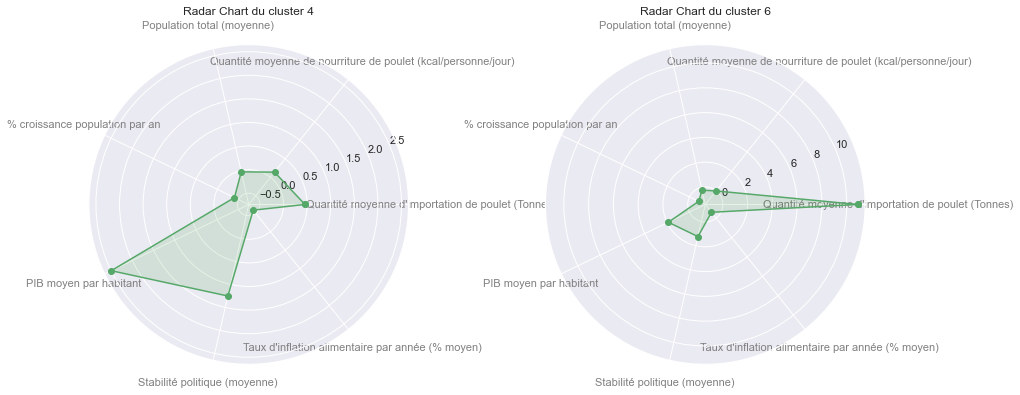

In [194]:
#On commence par les 2 clusters qui concerne l'importation de poulet

fig = plt.figure(figsize=(15, 20))

ax = fig.add_subplot(321, projection="polar")
#theta a des angles différents, et le premier est répété
theta = np.arange(len(dk5) + 1) / float(len(dk5)) * 2 * np.pi
#les valeurs ont les 5 valeurs de 'Col B', avec le premier élément répété
values = dk5['Col B'].values
values = np.append(values, values[0])
#dessiner le polygone et marquer les points pour chaque combinaison angle/valeur
l1, = ax.plot(theta, values, color="C2", marker="o", label="Name of Col B")
plt.xticks(theta[:-1], dk5['Col A'], color='grey', size=11)
ax.tick_params(pad=10) #pour augmenter la distance des étiquettes au tracé
#remplit la zone du polygone de vert et de transparence
ax.fill(theta, values, 'green', alpha=0.1)
#plt.legend()#affiche la légende, en utilisant l’étiquette du tracé de ligne (utile lorsqu’il y a plus d’un polygone)
plt.title("Radar Chart du cluster 4")

ax = fig.add_subplot(322, projection="polar")
theta = np.arange(len(dk7) + 1) / float(len(dk7)) * 2 * np.pi
values = dk7['Col B'].values
values = np.append(values, values[0])
l1, = ax.plot(theta, values, color="C2", marker="o", label="Name of Col B")
plt.xticks(theta[:-1], dk7['Col A'], color='grey', size=11)
ax.tick_params(pad=10)
ax.fill(theta, values, 'green', alpha=0.1)
plt.title("Radar Chart du cluster 6")
plt.show()

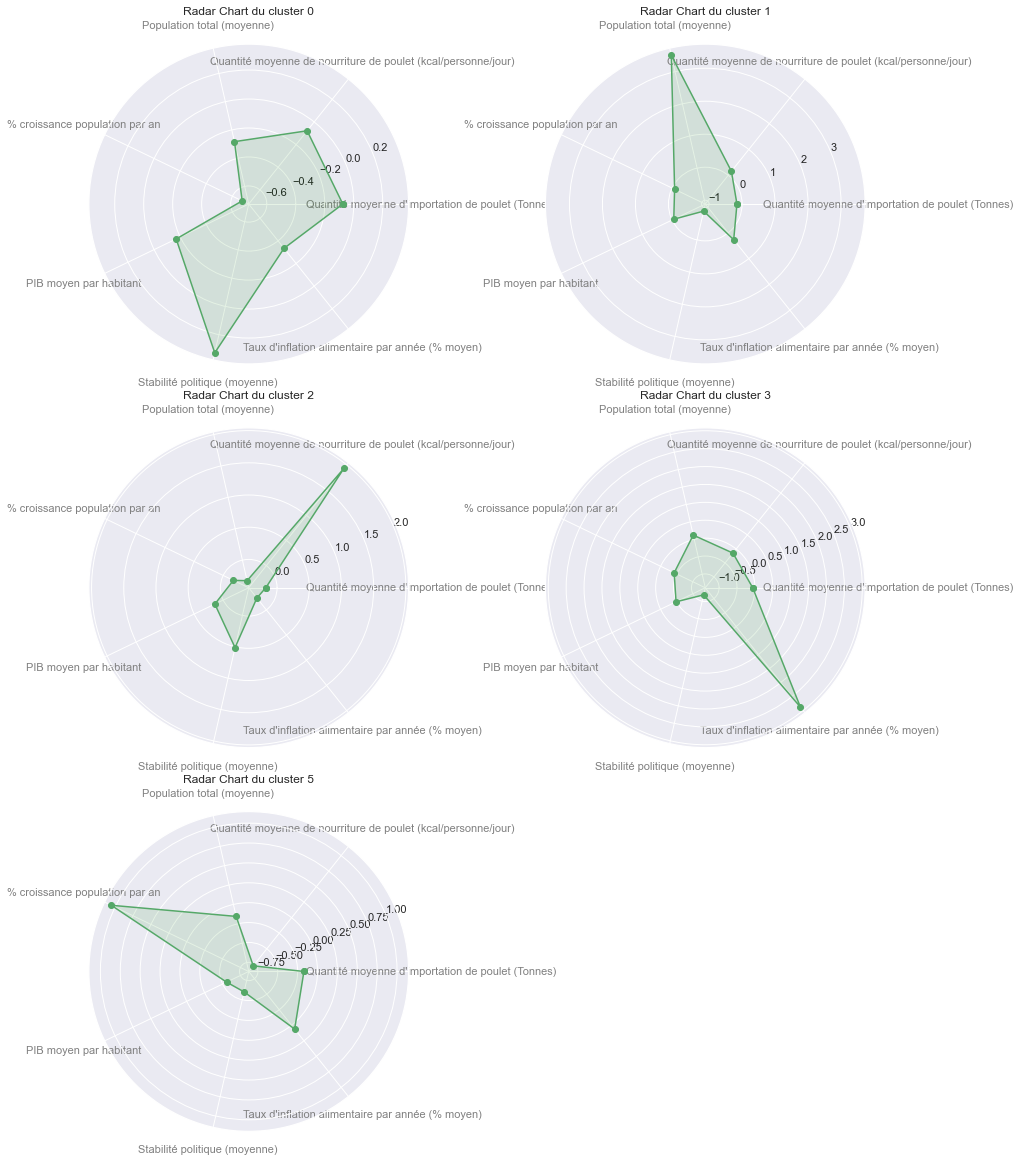

In [195]:
#Regardons maintenant les autres. clusters

fig = plt.figure(figsize=(15, 20))

ax = fig.add_subplot(321, projection="polar")
#theta a des angles différents, et le premier est répété
theta = np.arange(len(dk1) + 1) / float(len(dk1)) * 2 * np.pi
#les valeurs ont les 5 valeurs de 'Col B', avec le premier élément répété
values = dk1['Col B'].values
values = np.append(values, values[0])
#dessiner le polygone et marquer les points pour chaque combinaison angle/valeur
l1, = ax.plot(theta, values, color="C2", marker="o", label="Name of Col B")
plt.xticks(theta[:-1], dk1['Col A'], color='grey', size=11)
ax.tick_params(pad=10) #pour augmenter la distance des étiquettes au tracé
#remplit la zone du polygone de vert et de transparence
ax.fill(theta, values, 'green', alpha=0.1)
#plt.legend()#affiche la légende, en utilisant l’étiquette du tracé de ligne (utile lorsqu’il y a plus d’un polygone)
plt.title("Radar Chart du cluster 0")

ax = fig.add_subplot(322, projection="polar")
theta = np.arange(len(dk2) + 1) / float(len(dk2)) * 2 * np.pi
values = dk2['Col B'].values
values = np.append(values, values[0])
l1, = ax.plot(theta, values, color="C2", marker="o", label="Name of Col B")
plt.xticks(theta[:-1], dk2['Col A'], color='grey', size=11)
ax.tick_params(pad=10)
ax.fill(theta, values, 'green', alpha=0.1)
plt.title("Radar Chart du cluster 1")

ax = fig.add_subplot(323, projection="polar")
theta = np.arange(len(dk3) + 1) / float(len(dk3)) * 2 * np.pi
values = dk3['Col B'].values
values = np.append(values, values[0])
l1, = ax.plot(theta, values, color="C2", marker="o", label="Name of Col B")
plt.xticks(theta[:-1], dk3['Col A'], color='grey', size=11)
ax.tick_params(pad=10)
ax.fill(theta, values, 'green', alpha=0.1)
plt.title("Radar Chart du cluster 2")

ax = fig.add_subplot(324, projection="polar")
theta = np.arange(len(dk4) + 1) / float(len(dk4)) * 2 * np.pi
values = dk4['Col B'].values
values = np.append(values, values[0])
l1, = ax.plot(theta, values, color="C2", marker="o", label="Name of Col B")
plt.xticks(theta[:-1], dk4['Col A'], color='grey', size=11)
ax.tick_params(pad=10)
ax.fill(theta, values, 'green', alpha=0.1)
plt.title("Radar Chart du cluster 3")

ax = fig.add_subplot(325, projection="polar")
theta = np.arange(len(dk6) + 1) / float(len(dk6)) * 2 * np.pi
values = dk6['Col B'].values
values = np.append(values, values[0])
l1, = ax.plot(theta, values, color="C2", marker="o", label="Name of Col B")
plt.xticks(theta[:-1], dk6['Col A'], color='grey', size=11)
ax.tick_params(pad=10)
ax.fill(theta, values, 'green', alpha=0.1)
plt.title("Radar Chart du cluster 5")

plt.show()

In [196]:
cluster_6 = df_k.loc[df_k['Clusters']==6]
cluster_6.sort_values("Quantité moyenne d'importation de poulet (Tonnes)", ascending=False)

,Pays,Quantité moyenne d'importation de poulet (Tonnes),Quantité moyenne de nourriture de poulet (kcal/personne/jour),Population total (moyenne),% croissance population par an,PIB moyen par habitant,Stabilité politique (moyenne),Taux d'inflation alimentaire par année (% moyen),Clusters
94,Netherlands,10.901954,-0.017863,-0.227979,-0.828488,1.890706,1.243624,-0.609201,6


In [197]:
cluster_4 = df_k.loc[df_k['Clusters']==4]
cluster_4.sort_values("Quantité moyenne d'importation de poulet (Tonnes)", ascending=False)

,Pays,Quantité moyenne d'importation de poulet (Tonnes),Quantité moyenne de nourriture de poulet (kcal/personne/jour),Population total (moyenne),% croissance population par an,PIB moyen par habitant,Stabilité politique (moyenne),Taux d'inflation alimentaire par année (% moyen),Clusters
12,Belgium,4.446140,-0.530972,-0.345278,-0.593815,1.635949,0.862585,-0.547136,4
51,Germany,2.242321,-0.144123,1.115373,-0.721819,1.626903,0.971453,-0.501845,4
25,Canada,0.768469,1.227626,0.164402,-0.280919,1.805565,1.396040,-0.567265,4
7,Austria,0.275695,-0.130460,-0.399193,-0.487146,1.813223,1.417814,-0.498490,4
141,United Kingdom of Great Britain and Northern I...,-0.001875,0.681758,0.782206,-0.536925,1.553585,0.590413,-0.735010,4
64,Ireland,-0.076633,0.388082,-0.482011,-0.572482,2.410147,1.156530,-1.023530,4
28,"China, Macao SAR",-0.088337,1.142684,-0.566264,0.458654,3.602961,1.341606,0.004744,4
37,Denmark,-0.127829,0.193340,-0.460955,-0.714707,2.350831,1.123869,-0.632685,4
68,Japan,-0.177741,-0.152354,2.075703,-1.120050,1.384071,1.243624,-0.552168,4
81,Luxembourg,-0.178538,-0.039921,-0.566966,0.615102,5.046709,1.624664,-0.518619,4


In [198]:
#on garde les 2 meilleurs clusters
best_cluster_k = cluster_6.append(cluster_4)
best_cluster_k = best_cluster_k.drop(["Clusters"], axis=1)
best_cluster_k.set_index('Pays', inplace = True)

best_cluster_k.sort_values("Quantité moyenne d'importation de poulet (Tonnes)", ascending=False)

,Quantité moyenne d'importation de poulet (Tonnes),Quantité moyenne de nourriture de poulet (kcal/personne/jour),Population total (moyenne),% croissance population par an,PIB moyen par habitant,Stabilité politique (moyenne),Taux d'inflation alimentaire par année (% moyen)
Pays,,,,,,,
Netherlands,10.901954,-0.017863,-0.227979,-0.828488,1.890706,1.243624,-0.609201
Belgium,4.446140,-0.530972,-0.345278,-0.593815,1.635949,0.862585,-0.547136
Germany,2.242321,-0.144123,1.115373,-0.721819,1.626903,0.971453,-0.501845
Canada,0.768469,1.227626,0.164402,-0.280919,1.805565,1.396040,-0.567265
Austria,0.275695,-0.130460,-0.399193,-0.487146,1.813223,1.417814,-0.498490
United Kingdom of Great Britain and Northern Ireland,-0.001875,0.681758,0.782206,-0.536925,1.553585,0.590413,-0.735010
Ireland,-0.076633,0.388082,-0.482011,-0.572482,2.410147,1.156530,-1.023530
"China, Macao SAR",-0.088337,1.142684,-0.566264,0.458654,3.602961,1.341606,0.004744
Denmark,-0.127829,0.193340,-0.460955,-0.714707,2.350831,1.123869,-0.632685
